<a href="https://colab.research.google.com/github/wilferalexander/Covid19/blob/main/Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**COVID-19 ANALISIS**

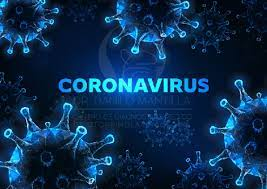


El COVID-19, también conocido como enfermedad por coronavirus 2019, es una enfermedad infecciosa causada por el virus SARS-CoV-2, un tipo de coronavirus que fue identificado por primera vez en diciembre de 2019 en la ciudad de Wuhan, en la provincia de Hubei, China. El término "COVID-19" se deriva de "COronaVIrus Disease 2019".

La enfermedad se propagó rápidamente a nivel mundial, llevando a la Organización Mundial de la Salud (OMS) a declararla como una pandemia el 11 de marzo de 2020. El COVID-19 se caracteriza por síntomas que pueden variar desde leves, como fiebre y tos, hasta síntomas más graves, como dificultades respiratorias, neumonía y, en casos extremos, puede llevar a la muerte.

El virus se propaga principalmente a través de las gotas respiratorias que se generan cuando una persona infectada tose, estornuda o habla. También puede transmitirse al tocar superficies contaminadas y luego tocarse la cara. La pandemia tuvo un impacto significativo en la salud pública, la economía global y la vida cotidiana de las personas en todo el mundo. Se implementaron medidas de distanciamiento social, cuarentenas y restricciones de viaje para frenar la propagación del virus.

La investigación científica y los esfuerzos globales llevaron al desarrollo y aprobación de vacunas contra el COVID-19 para prevenir la enfermedad y reducir su gravedad. La situación con respecto al COVID-19 sigue siendo dinámica, y las medidas para abordar la pandemia continúan evolucionando a medida que se obtiene más información y se implementan estrategias de salud pública.


#**PROBLEMA DE NEGOCIO**


---

Una entidad gubernamental responsable de la gestión de la salud en un país enfrenta el desafío de comprender y analizar la propagación del COVID-19 para tomar decisiones informadas y eficaces en la gestión de la pandemia. Como científico de datos, tu tarea es analizar los datos relacionados con el COVID-19 y presentar insights a través de visualizaciones que respondan a las siguientes preguntas clave:

### **Preguntas**

1. ¿Cómo ha evolucionado el Covid-19 en el país en comparación con el impacto observado a nivel global?

2. ¿Cuál ha sido la evolución de los nuevos casos diarios reportados de Covid-19 en el país a lo largo del tiempo?

3. ¿Cuál es la evolución del índice de letalidad del Covid-19 en el país, comparado con los países con los índices históricos más elevados?

4. Desde una perspectiva demográfica, ¿cuáles son las características que tienen un mayor impacto en el índice de letalidad de un país?

5. ¿Existe


para validar nuestros datos

https://data.who.int/dashboards/covid19/cases

https://population.un.org/wpp/Graphs/DemographicProfiles/Line/900

https://www.worldometers.info/coronavirus/worldwide-graphs/





#**1.  Configuración del ambiente**

In [223]:
!python -V
print('------')
!pip show Pandas | grep 'Name\|Version'
print('------')
!pip show Matplotlib | grep 'Name\|Version'

Python 3.10.12
------
Name: pandas
Version: 1.5.3
------
Name: matplotlib
Version: 3.7.1


#**2. Obtención, Tratamiento y Análisis Exploratorio (EDA)**

En este paso vamos a realizar limpieza de datos, manejar valores faltantes, análisis exploratorio, etc.

In [224]:
#Importamos librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import warnings
%matplotlib inline
from io import StringIO
import requests
import sklearn
import missingno as msno ## Importamos la Librería Missingno, para poder visualizar nuestros valores nulos presentes

#theme
theme = ["#DEF5E5", "#459E97", "#4B9ABB","#0A4361","#E68193",]

Cargando las bases de datos

En este paso vamos a cargar dos bases de datos:

Base con informaciones de evolución del Covid19 de World Health Organization, guardaremos esto en **df_covid**.

Base con informaciones demográficas de Population United Nations, guardaremos en df_populationy filtraremos un año para análisis.

In [225]:
#Importamos los dataset
df_covid = pd.read_csv(StringIO(requests.get("https://covid19.who.int/WHO-COVID-19-global-data.csv").text))
df_population = pd.read_excel('https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/WPP2022_GEN_F01_DEMOGRAPHIC_INDICATORS_COMPACT_REV1.xlsx', sheet_name=0, skiprows=16)
df_population = df_population[df_population['Year'] == 2019]

In [226]:
#Validamos con un sample el dataset de covid
df_covid.sample(8)

Date_reported Country_code                           Country WHO_region  \
25500    2021-02-28           LA  Lao People's Democratic Republic       WPRO   
33286    2020-01-19           NG                           Nigeria       AFRO   
36465    2020-01-12           PL                            Poland       EURO   
47788    2021-09-12           UG                            Uganda       AFRO   
44380    2021-05-23           SE                            Sweden       EURO   
31998    2023-10-22           NR                             Nauru       WPRO   
38109    2023-02-05           RO                           Romania       EURO   
24432    2021-01-03           KE                             Kenya       AFRO   

       New_cases  Cumulative_cases  New_deaths  Cumulative_deaths  
25500        NaN                45         NaN                  0  
33286        NaN                 0         NaN                  0  
36465        NaN                 0         NaN                  0  
47788      925.0            121587        46.0               3099  
44380    18960.0           1062343        72.0              14483  
31998        NaN              5393         NaN                  1  
38109     2799.0           3327805        43.0              67619  
24432      835.0             96678        30.0               1685

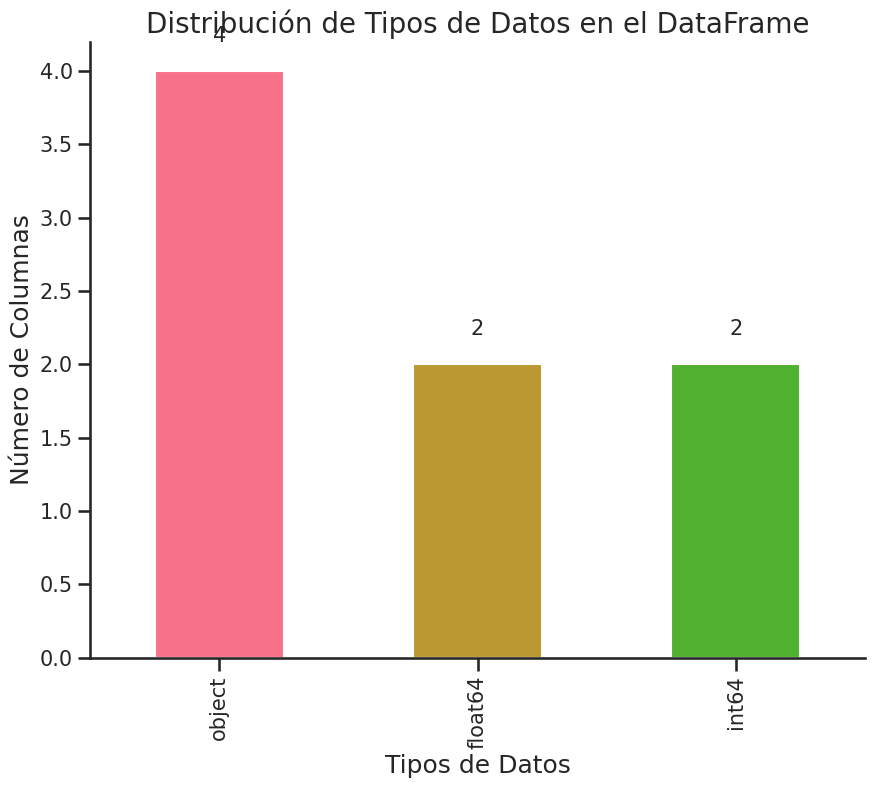

In [227]:
# Establecemos el estilo de Seaborn
sns.set(style="ticks", context="talk", font_scale=1, palette="husl")
# Creamos una figura de tamaño personalizado
plt.figure(figsize=(10, 8))
# Contamos los tipos de datos y creamos un gráfico de barras
ax = df_covid.dtypes.value_counts().plot(kind='bar', color=sns.color_palette("husl"), grid=False, fontsize=15)
# Etiquetamos las barras con el recuento de cada tipo de dato
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.2, height, ha='center', size=15)
# Personalizamos el gráfico
ax.set_xlabel("Tipos de Datos", fontsize=18)
ax.set_ylabel("Número de Columnas", fontsize=18)
ax.set_title("Distribución de Tipos de Datos en el DataFrame", fontsize=20)
# Eliminamos los bordes desagradables
sns.despine()
# Mostramos el grafico el gráfico
plt.show()

graficamos los tipo de datos que tenemos en el dataset para visualizar de manera mas grafica
1. Categoricas tenemos 4
2. Float 2
3. enteras 2

In [228]:
#Información de los datos
print("Número de filas: ",df_covid.shape[0])
print("Número de Columnas:",df_covid.shape[1])
print("Datos Duplicados",df_covid.duplicated().sum())
print("Variables Categóricas: ",df_covid.select_dtypes(include='object').shape[1])
print("Variables Numéricas: ",df_covid.select_dtypes(exclude='object').shape[1])

Número de filas:  50880
Número de Columnas: 8
Datos Duplicados 211
Variables Categóricas:  4
Variables Numéricas:  4


In [229]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50880 entries, 0 to 50879
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      50880 non-null  object 
 1   Country_code       49396 non-null  object 
 2   Country            49608 non-null  object 
 3   WHO_region         45792 non-null  object 
 4   New_cases          36622 non-null  float64
 5   Cumulative_cases   50880 non-null  int64  
 6   New_deaths         24216 non-null  float64
 7   Cumulative_deaths  50880 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.1+ MB



el set de datos contienen la siguiente informacion

1. Número de filas:  50880
2. Número de Columnas: 8
3. Datos Duplicados 211
4. Variables Categóricas:  4
5. Variables Numéricas:  4

Podemos observa que tenemos valores nulos


### 2.1 Tratamiento de Valores nulos

In [230]:
#datos nulos por columna
df_covid.isnull().sum().sort_values(ascending=False)

New_deaths           26664
New_cases            14258
WHO_region            5088
Country_code          1484
Country               1272
Date_reported            0
Cumulative_cases         0
Cumulative_deaths        0
dtype: int64

* Observamos que existe presencia de datos nulos.
* Tenemos que validar la relación que existen entre datos nulos.
* La presencia de datos nulos en variables como 'country_code' y 'country', nos generan alerta, ya que de no tener datos para estas columnas, esto no generaría valor para el dataset.
* Se evaluará la posibilidad de eliminar ciertas filas que tengan presencia de valores nulos.

Text(0, 0.5, 'Filas')

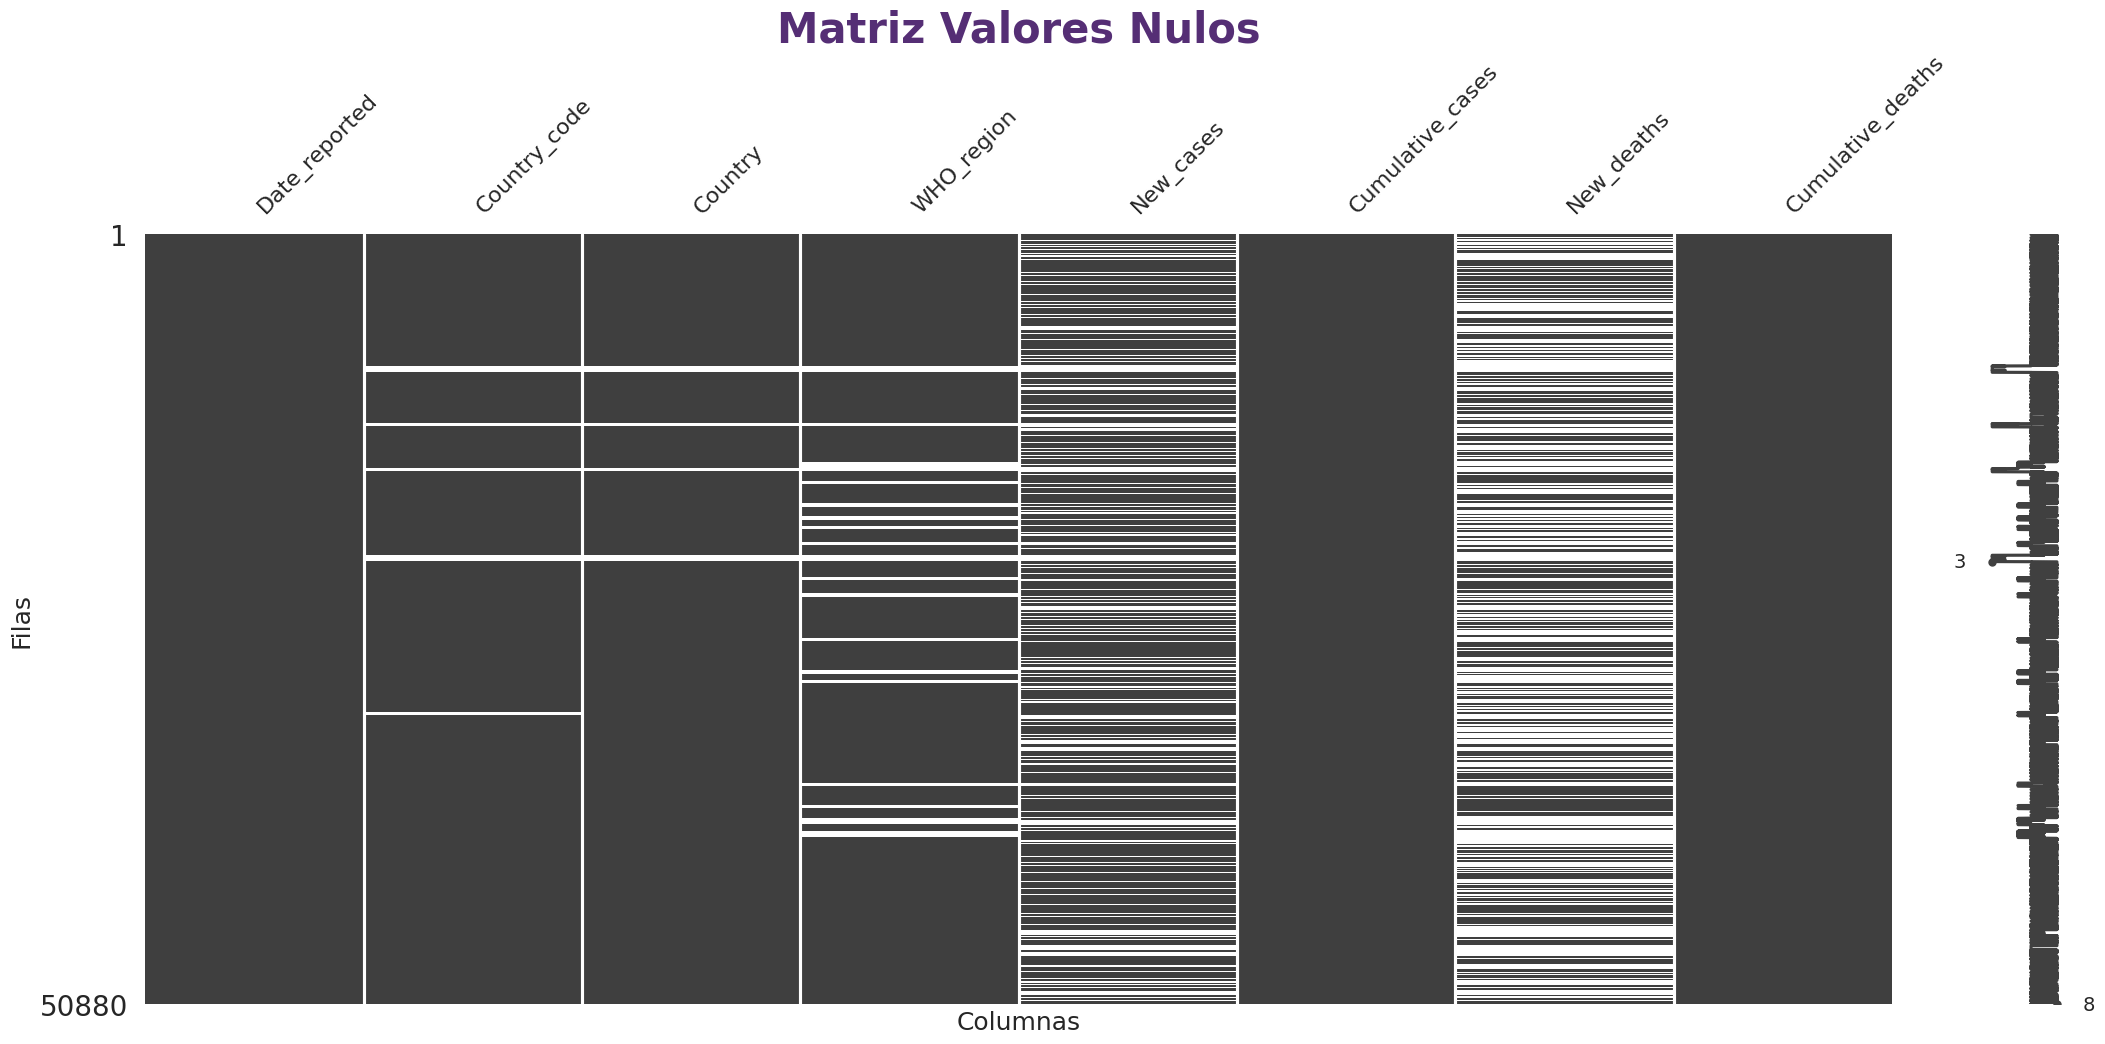

In [231]:
# Visualización con seaborn de los valores nulos
msno.matrix(df_covid)
plt.title('Matriz Valores Nulos', fontdict={'fontsize': 30, 'fontweight': 'bold', 'color': '#552E75'})
plt.xlabel('Columnas')
plt.ylabel('Filas')

Logramos evidenciar que las siguientes variables como New_deaths,New_cases,WHO_region tienen varios valores nulos pero es logico poque son las muertes nuevas y casos nuevos y en que regio las cuales estan altamente correlacionadas

tambien podemos determinar que los nulos para country code y country es pequeña y no deberia afectar mucho nuestro analisis



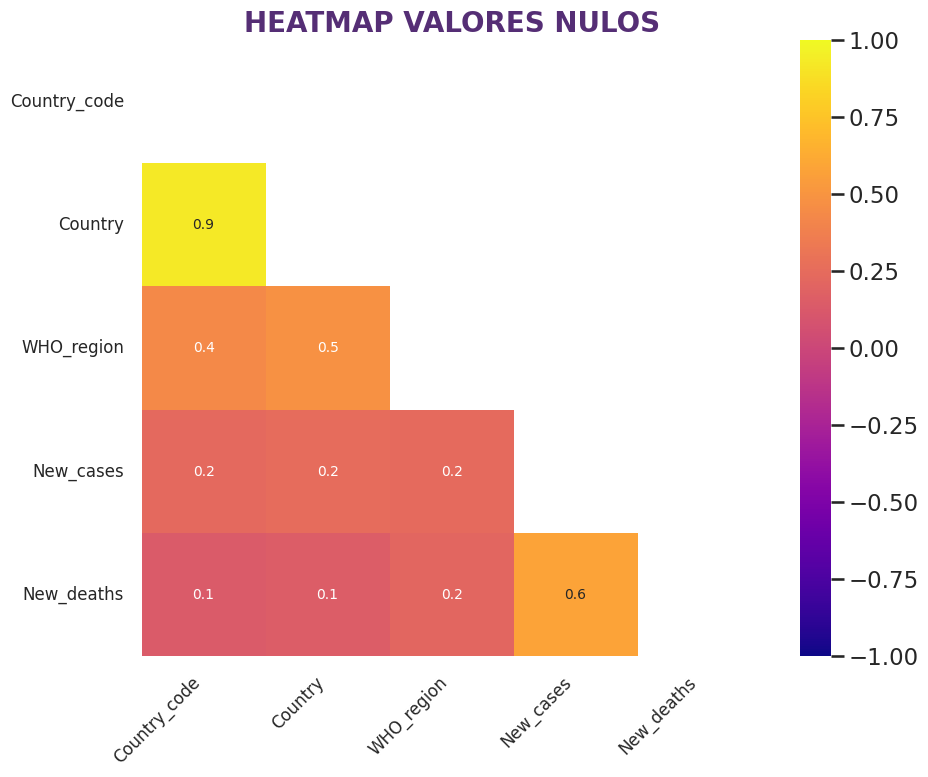

In [232]:
msno.heatmap(df_covid,cmap='plasma',
    vmin=-1,
    vmax=1,
    cbar=True,
    figsize=(10, 8),
    fontsize=12)
plt.title('HEATMAP VALORES NULOS',fontdict={'fontsize': 20, 'fontweight': 'bold', 'color': '#552E75'})
plt.show()

Este mapa de calor nos permite observar la relación clara entre country y country code

In [233]:
#Identificar los valores unicos por columna
df_covid.nunique()

Date_reported          212
Country_code           233
Country                234
WHO_region               6
New_cases            11877
Cumulative_cases     31717
New_deaths            2126
Cumulative_deaths    13650
dtype: int64

In [235]:
#filtramos la columna 'Country_code'
nombre_columna_deseada = 'Country_code'
# Filtrar solo la columna deseada
columna_filtrada = df_covid[nombre_columna_deseada]
# Mostrar los primeros 5 elementos aleatorios
columna_filtrada.sample(5)

39391    LC
32777    NZ
5973     BR
49243    UZ
37681    MD
Name: Country_code, dtype: object

In [236]:
#filtramos la columna 'Country_code'
nombre_columna_deseada = 'Country_code'
# Contar valores nulos en la columna deseada
cantidad_nulos = df_covid[nombre_columna_deseada].isnull().sum()
# Mostrar la cantidad de valores nulos
print(f"La columna '{nombre_columna_deseada}' tiene {cantidad_nulos} valores nulos.")

La columna 'Country_code' tiene 1484 valores nulos.


Mantener en el dataframe sólo las siguientes columnas:
1. 'Date_reported'
2. 'Country_code'
3. 'Country'
4. 'New_cases'
5. 'Cumulative_cases'
6. 'New_deaths'
7. 'Cumulative_deaths'

In [237]:
# Listamos de columnas que deseas mantener
columnas_a_mantener = ['Date_reported', 'Country_code', 'Country', 'New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths']
# Crear un nuevo DataFrame con solo las columnas deseadas
df_covid_limpio = df_covid[columnas_a_mantener]
# Mostramos las primeras filas del DataFrame resultante
df_covid_limpio.sample(5)

Date_reported Country_code      Country  New_cases  Cumulative_cases  \
10481    2021-10-17           CR   Costa Rica     7123.0            551144   
12879    2023-01-22           DJ     Djibouti        NaN             15690   
22575    2021-12-26           IE      Ireland    47414.0            696093   
13870    2021-09-26           SV  El Salvador     3977.0            103678   
30620    2021-10-10           ME   Montenegro     2519.0            129811   

       New_deaths  Cumulative_deaths  
10481       185.0               6797  
12879         NaN                189  
22575        53.0               6054  
13870        84.0               3174  
30620        52.0               1868



1.   Eliminar todos los registros con nulos en la columna Country_code. y crearemos el dataset df_covid_limpio




In [238]:
# Filtramos por Country_code
columna_a_filtrar = 'Country_code'
# Eliminamos registros con valores nulos en la columna 'Country_code' y creamos un dataset nuevo
df_covid_limpio = df_covid_limpio.dropna(subset=[columna_a_filtrar])
# mostraoms información del DataFrame resultante
print("Información de df_covid_limpio después de eliminar nulos en 'Country_code':")
print(df_covid_limpio.info())

Información de df_covid_limpio después de eliminar nulos en 'Country_code':
<class 'pandas.core.frame.DataFrame'>
Int64Index: 49396 entries, 0 to 50879
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      49396 non-null  object 
 1   Country_code       49396 non-null  object 
 2   Country            49396 non-null  object 
 3   New_cases          36436 non-null  float64
 4   Cumulative_cases   49396 non-null  int64  
 5   New_deaths         24088 non-null  float64
 6   Cumulative_deaths  49396 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 3.0+ MB
None


Text(0, 0.5, 'Filas')

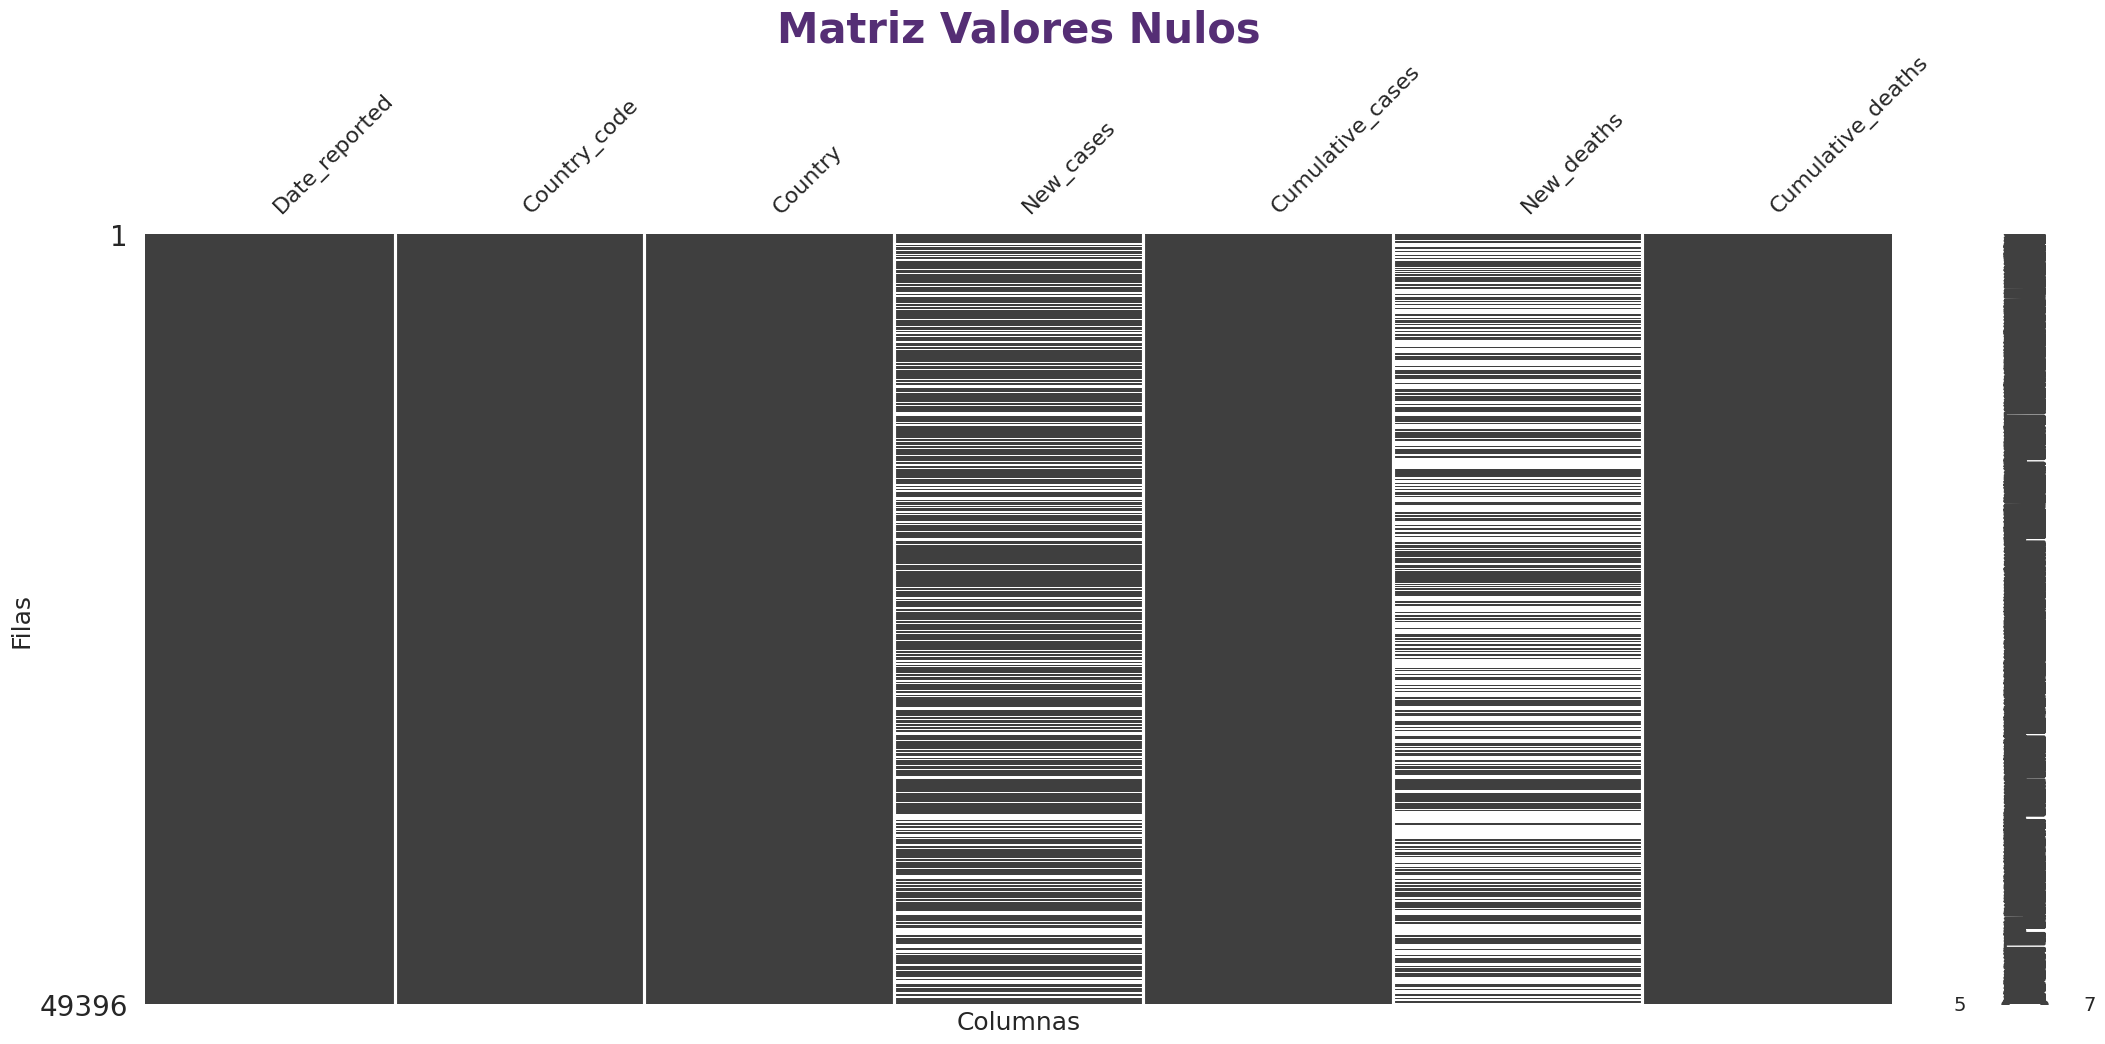

In [239]:
# Visualización con seaborn de los valores nulos
msno.matrix(df_covid_limpio)
plt.title('Matriz Valores Nulos', fontdict={'fontsize': 30, 'fontweight': 'bold', 'color': '#552E75'})
plt.xlabel('Columnas')
plt.ylabel('Filas')

Substituir todos los valores nulos con cero.

In [240]:
# Reemplazamos todos los valores nulos con cero en el DataFrame
df_covid_limpio = df_covid_limpio.fillna(0)
# Mostramos las primeras filas del DataFrame resultante
df_covid_limpio.sample(5)

Date_reported Country_code                           Country  New_cases  \
10755    2022-12-25           CI                     Côte d'Ivoire       22.0   
38958    2023-02-12           SH                      Saint Helena        0.0   
30049    2023-01-08           FM  Micronesia (Federated States of)       13.0   
48836    2021-06-20           VI      United States Virgin Islands       78.0   
49602    2023-12-17           VU                           Vanuatu        0.0   

       Cumulative_cases  New_deaths  Cumulative_deaths  
10755             87933         0.0                830  
38958              2166         0.0                  0  
30049             22247         0.0                 58  
48836              3768         2.0                 30  
49602             12019         0.0                 14

In [241]:
# Imprimir las diferencias
df_covid_limpio.shape, df_covid.shape

((49396, 7), (50880, 8))

Cambiar el formato actual de la columna Date_reported para un formato de tipo datetime64[ns]

In [242]:
df_covid_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49396 entries, 0 to 50879
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      49396 non-null  object 
 1   Country_code       49396 non-null  object 
 2   Country            49396 non-null  object 
 3   New_cases          49396 non-null  float64
 4   Cumulative_cases   49396 non-null  int64  
 5   New_deaths         49396 non-null  float64
 6   Cumulative_deaths  49396 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 3.0+ MB


In [243]:
# Verificamos el tipo de dato actual de la columna Date_reported
print("Tipo de dato actual de Date_reported:", df_covid_limpio['Date_reported'].dtype)
# Convertir la columna Date_reported a datetime64
df_covid_limpio['Date_reported'] = pd.to_datetime(df_covid_limpio['Date_reported'], format='%Y-%m-%d')
# Verificamos el tipo de dato después de la conversión
print("Tipo de dato después de la conversión:", df_covid_limpio['Date_reported'].dtype)
df_covid_limpio.sample(5)

Tipo de dato actual de Date_reported: object
Tipo de dato después de la conversión: datetime64[ns]


Date_reported Country_code                Country  New_cases  \
40540    2020-12-06           ST  Sao Tome and Principe       14.0   
49289    2022-01-09           UZ             Uzbekistan     1548.0   
9833     2021-07-25           KM                Comoros       10.0   
40969    2021-01-10           SN                Senegal     1489.0   
42424    2020-06-21           SI               Slovenia       25.0   

       Cumulative_cases  New_deaths  Cumulative_deaths  
40540               999         0.0                 17  
49289            119132        12.0                876  
9833               4021         0.0                147  
40969             21000        43.0                459  
42424              1521         0.0                114

Substituir el formato actual de las columnas **['New_cases', 'New_deaths']**para un formato de tipo int64.

In [244]:
# convertimos las columnas 'New_cases' y 'New_deaths' a tipo int64
df_covid_limpio['New_cases'] = pd.to_numeric(df_covid_limpio['New_cases'], errors='coerce', downcast='integer')
df_covid_limpio['New_deaths'] = pd.to_numeric(df_covid_limpio['New_deaths'], errors='coerce', downcast='integer')
# Convertir explícitamente a int64
df_covid_limpio['New_cases']= df_covid_limpio['New_cases'].astype('Int64')
df_covid_limpio['New_deaths']= df_covid_limpio['New_deaths'].astype('Int64')
# Verificar el tipo de dato después de la conversión
print("Tipo de dato después de la conversión de New_cases:", df_covid_limpio['New_cases'].dtype)
print("Tipo de dato después de la conversión de New_deaths:", df_covid_limpio['New_deaths'].dtype)

Tipo de dato después de la conversión de New_cases: Int64
Tipo de dato después de la conversión de New_deaths: Int64


Crear una nueva columna **'lethality_rate'** con la siguiente fórmula: 'Cumulative_deaths'/'Cumulative_cases'*100

In [245]:
# Asegúramos de que las columnas 'Cumulative_deaths' y 'Cumulative_cases' sean de tipo numérico
df_covid_limpio['Cumulative_deaths'] = pd.to_numeric(df_covid_limpio['Cumulative_deaths'], errors='coerce')
df_covid_limpio['Cumulative_cases'] = pd.to_numeric(df_covid_limpio['Cumulative_cases'], errors='coerce')
# Crear la nueva columna 'lethality_rate'
df_covid_limpio['lethality_rate'] =(df_covid_limpio['Cumulative_deaths']/df_covid_limpio['Cumulative_cases'])*100
df_covid_limpio.sample(5)

Date_reported Country_code              Country  New_cases  \
1297     2020-06-28           AI             Anguilla          0   
1533     2020-12-13           AG  Antigua and Barbuda          3   
13875    2021-10-31           SV          El Salvador       1132   
4598     2022-10-23           BJ                Benin          0   
18101    2021-07-25           GR               Greece      18090   

       Cumulative_cases  New_deaths  Cumulative_deaths  lethality_rate  
1297                  3           0                  0        0.000000  
1533                147           0                  4        2.721088  
13875            113422          68               3622        3.193384  
4598              27782           0                163        0.586711  
18101            485507          44              12919        2.660930

Vamos a convertir en 0 los valores nulos en la columna **lethality_rate**

In [246]:
df_covid_limpio = df_covid_limpio.fillna(0)
df_covid_limpio.sample(5)

Date_reported Country_code             Country  New_cases  \
13269    2022-05-29           DO  Dominican Republic       1909   
36456    2023-12-03           PN            Pitcairn          0   
8529     2020-12-13           TD                Chad         29   
32680    2020-08-16           NZ         New Zealand         52   
6666     2021-10-24           BG            Bulgaria      28454   

       Cumulative_cases  New_deaths  Cumulative_deaths  lethality_rate  
13269            583159           0               4377        0.750567  
36456                 4           0                  0        0.000000  
8529               1751           0                103        5.882353  
32680              1271           0                 22        1.730921  
6666             568073         802              23033        4.054585

Con el fin de eliminar outliers, nos quedaremos con los registros cuyo valor en la columna lethality_rate se encuentre entre los cuantiles 0 a 0.99

In [247]:
# Calcular los cuantiles
quantile_0 = df_covid_limpio['lethality_rate'].quantile(0)
quantile_99 = df_covid_limpio['lethality_rate'].quantile(0.99)

In [248]:
# Filtramos el DataFrame para incluir solo los registros dentro del rango de cuantiles
df_covid_limpio = df_covid_limpio[(df_covid_limpio['lethality_rate'] >= quantile_0) & (df_covid_limpio['lethality_rate'] <= quantile_99)]

# Mostrar las primeras filas del DataFrame resultante
df_covid_limpio.sample(5)

Date_reported Country_code                   Country  New_cases  \
25670    2020-05-10           LV                    Latvia         60   
25798    2022-10-23           LV                    Latvia       4373   
13301    2023-01-08           DO        Dominican Republic        342   
48655    2022-01-23           US  United States of America    5042888   
32112    2021-12-05           NP                     Nepal       1714   

       Cumulative_cases  New_deaths  Cumulative_deaths  lethality_rate  
25670               940           2                 18        1.914894  
25798            946047          18               6819        0.720789  
13301            659518           0               4384        0.664728  
48655          69967616       16308             864137        1.235053  
32112            822592          18              11541        1.403004

In [249]:
# Reiniciar el índice del DataFrame
df_covid_limpio = df_covid_limpio.reset_index(drop=True)
# Mostramos 5 filas del DataFrame resultante
df_covid_limpio.sample(5)

Date_reported Country_code        Country  New_cases  Cumulative_cases  \
24301    2021-03-28           LV         Latvia       3631            101038   
4279     2021-05-02           BZ         Belize         69             12668   
48582    2021-10-17           ZM         Zambia        169            209505   
7345     2023-07-23           CV     Cabo Verde         11             64172   
14616    2021-01-03           FO  Faroe Islands         43               617   

       New_deaths  Cumulative_deaths  lethality_rate  
24301          46               2017        1.996279  
4279            2                323        2.549732  
48582           5               3658        1.746020  
7345            0                414        0.645141  
14616           0                  0        0.000000

Realizaremos otro analis adicional al dataframe

#### EDA VARIABLES NUMÉRICAS

In [250]:
def estadisticos_cont(num):
  #calcular describe
  estadisticos = num.describe().T
  #Añadimos la mediana
  estadisticos['median']= num.median()
  #recordamos para la mediana este al lado de la media
  estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
  #devolvemos
  return(estadisticos)

In [251]:
estadisticos_cont(df_covid_limpio.select_dtypes('number'))

count            mean        median             std  \
New_cases          48902.0    15789.610302    103.000000   242037.803742   
Cumulative_cases   48902.0  1659526.873707  43793.000000  7309165.651071   
New_deaths         48902.0      138.018609      0.000000      867.312807   
Cumulative_deaths  48902.0      19387.2969    471.000000    79473.229915   
lethality_rate     48902.0        1.452976      1.029184        1.625929   

                       min       25%       50%       75%          max  
New_cases         -65079.0       0.0     103.0   2005.75   40475477.0  
Cumulative_cases       0.0    3904.0   43793.0  507011.5  103436829.0  
New_deaths         -3432.0       0.0       0.0      20.0      47687.0  
Cumulative_deaths      0.0      29.0     471.0   6637.75    1165780.0  
lethality_rate         0.0  0.326607  1.029184  2.004507    12.260536

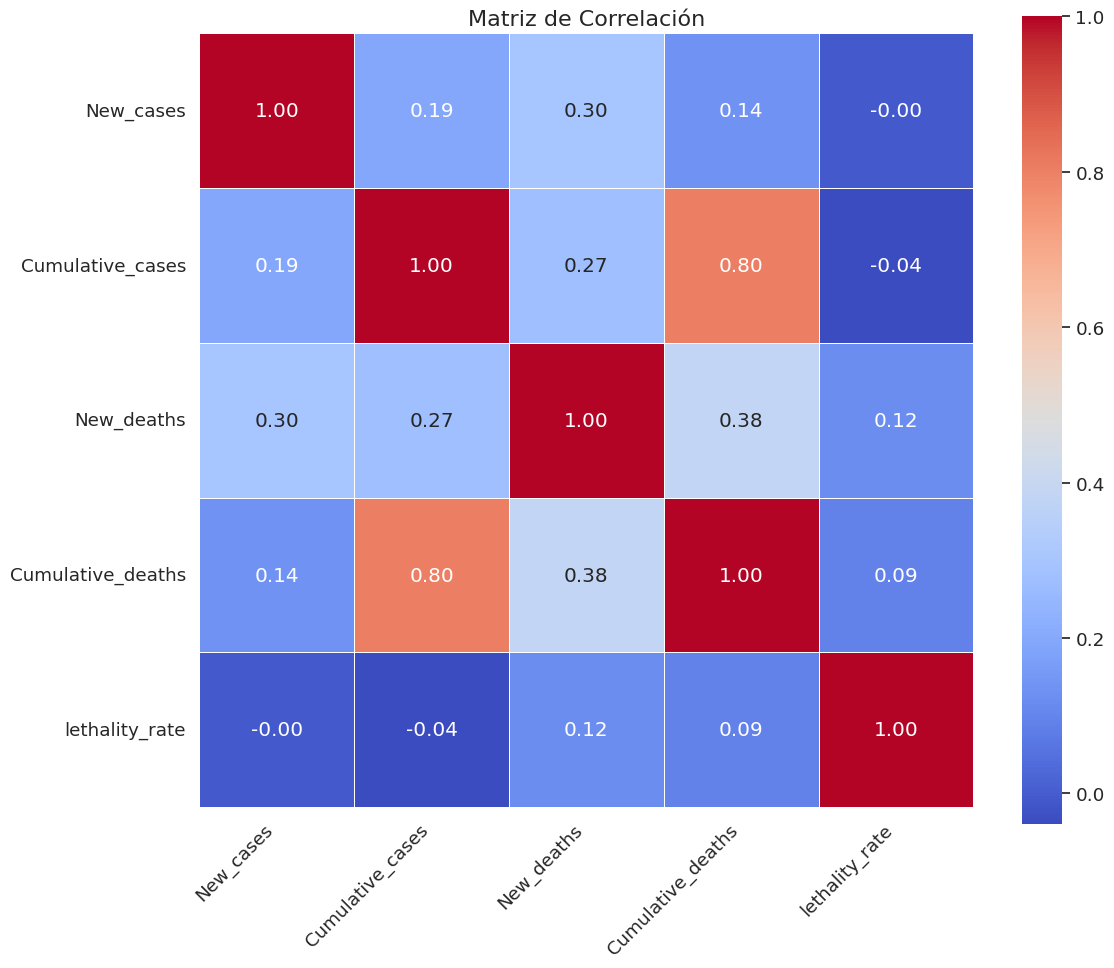

In [252]:
# Filtrar las columnas numéricas
df_numeric = df_covid_limpio.select_dtypes('number')

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Ajustes para mejorar la apariencia del gráfico
plt.figure(figsize=(12, 10))
sns.set(font_scale=1.2)  # Ajustar el tamaño de la fuente
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, square=True)
plt.title('Matriz de Correlación', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mejorar la legibilidad
plt.yticks(rotation=0)  # Mantener las etiquetas del eje y en posición horizontal
plt.tight_layout()  # Ajustar el diseño para evitar cortar etiquetas
plt.show()

In [253]:
import plotly.express as px
# Obtener el top 10 de países y países a evaluar y comparar
top_paises = df_covid_limpio.groupby('Country')['Cumulative_cases'].sum().nlargest(10).index
paises_adicionales = ['Colombia', 'Mexico', 'Peru']

# Filtrar el DataFrame para incluir solo el top 10 y países a evaluar y comparar
datos = df_covid_limpio[df_covid_limpio['Country'].isin(top_paises) | df_covid_limpio['Country'].isin(paises_adicionales)]

# Agrupar y sumar Cumulative_cases
datos_agrupados = datos.groupby('Country')[['Cumulative_cases']].sum().reset_index()

# Calcular el porcentaje de cada valor con respecto al total y redondear a dos decimales
datos_agrupados['porcentaje'] = datos_agrupados['Cumulative_cases'] / datos_agrupados['Cumulative_cases'].sum() * 100
datos_agrupados['porcentaje'] = datos_agrupados['porcentaje'].round(2).astype(str) + '%'

# Crear el gráfico de barras horizontal con etiquetas de porcentaje
fig = px.bar(datos_agrupados, x='Cumulative_cases', y='Country', color='Country',
             text='porcentaje',  # Usar el porcentaje como etiquetas de texto
             color_discrete_sequence=px.colors.qualitative.Set3,
             orientation='h')  # Mantener la orientación horizontal

# Configuración adicional del diseño
fig.update_layout(title='Casos Acumulados por país (Top 10 + Colombia, México, Perú)',
                  title_font=dict(size=20, family='Arial', color='#552E75'),  # Cambiar la fuente y el color
                  xaxis_title='Casos Acumulados',
                  yaxis_title='País',
                  legend_title='País',
                  yaxis=dict(categoryorder='total ascending'))  # Ordenar las categorías de mayor a menor)

# Mostrar el gráfico
fig.show(renderer="colab")

En este grafico logramos identificar el top 10 de paises con mas casos acumalados y agregamos a esta grafica los 3 paises objetivos que compararemos mas adelante

1. Podemos observar que Estados Unidos india y china son los paises con porcentajes mas altos acumulados de casos por pais
2. los paises obejtivos que estamos evaluando Mexico es el que tiene el porcentaje mas alto de los 3 seguido de colombia

In [254]:
import plotly.express as px
# Obtener el top 10 de países y países a evaluar y comparar
top_paises = df_covid_limpio.groupby('Country')['New_cases'].sum().nlargest(10).index
paises_adicionales = ['Colombia', 'Mexico', 'Peru']

# Filtrar el DataFrame para incluir solo el top 10 y países a evaluar y comparar
datos = df_covid_limpio[df_covid_limpio['Country'].isin(top_paises) | df_covid_limpio['Country'].isin(paises_adicionales)]

# Agrupar y sumar Cumulative_cases
datos_agrupados = datos.groupby('Country')[['New_cases']].sum().reset_index()

# Calcular el porcentaje de cada valor con respecto al total y redondear a dos decimales
datos_agrupados['porcentaje'] = datos_agrupados['New_cases'] / datos_agrupados['New_cases'].sum() * 100
datos_agrupados['porcentaje'] = datos_agrupados['porcentaje'].round(2).astype(str) + '%'

# Crear el gráfico de barras horizontal con etiquetas de porcentaje
fig = px.bar(datos_agrupados, x='New_cases', y='Country', color='Country',
             text='porcentaje',  # Usar el porcentaje como etiquetas de texto
             color_discrete_sequence=px.colors.qualitative.Set3,
             orientation='h')  # Mantener la orientación horizontal

# Configuración adicional del diseño
fig.update_layout(title='Nuevos Casos (Top 10 + Colombia, México, Perú)',
                  title_font=dict(size=20, family='Arial', color='#552E75'),  # Cambiar la fuente y el color
                  xaxis_title='Cantidad Nuevos Casos',
                  yaxis_title='País',
                  legend_title='País',
                  yaxis=dict(categoryorder='total ascending'))  # Ordenar las categorías de mayor a menor)

# Mostrar el gráfico
fig.show(renderer="colab")

En este grafico logramos identificar el top 10 de paises con mas casos mas casos nuevos  y agregamos a esta grafica los 3 paises objetivos que compararemos mas adelante

1. Podemos observar que Estados Unidos india y china son los paises con porcentajes mas altos de nuevos casos por pais
2. los paises obejtivos que estamos evaluando Mexico es el que tiene el porcentaje mas alto de los 3 seguido de colombia

In [255]:
import plotly.express as px
# Obtener el top 10 de países y países a evaluar y comparar
top_paises = df_covid_limpio.groupby('Country')['Cumulative_deaths'].sum().nlargest(10).index
paises_adicionales = ['Colombia', 'Mexico', 'Peru']

# Filtrar el DataFrame para incluir solo el top 10 y países a evaluar y comparar
datos = df_covid_limpio[df_covid_limpio['Country'].isin(top_paises) | df_covid_limpio['Country'].isin(paises_adicionales)]

# Agrupar y sumar Cumulative_cases
datos_agrupados = datos.groupby('Country')[['Cumulative_deaths']].sum().reset_index()

# Calcular el porcentaje de cada valor con respecto al total y redondear a dos decimales
datos_agrupados['porcentaje'] = datos_agrupados['Cumulative_deaths'] / datos_agrupados['Cumulative_deaths'].sum() * 100
datos_agrupados['porcentaje'] = datos_agrupados['porcentaje'].round(2).astype(str) + '%'

# Crear el gráfico de barras horizontal con etiquetas de porcentaje
fig = px.bar(datos_agrupados, x='Cumulative_deaths', y='Country', color='Country',
             text='porcentaje',  # Usar el porcentaje como etiquetas de texto
             color_discrete_sequence=px.colors.qualitative.Set3,
             orientation='h')  # Mantener la orientación horizontal

# Configuración adicional del diseño
fig.update_layout(title='Cumulative_deaths (Top 10 + Colombia, México, Perú)',
                  title_font=dict(size=20, family='Arial', color='#552E75'),  # Cambiar la fuente y el color
                  xaxis_title='Cumulative_deaths',
                  yaxis_title='País',
                  legend_title='País',
                  yaxis=dict(categoryorder='total ascending'))  # Ordenar las categorías de mayor a menor)

# Mostrar el gráfico
fig.show(renderer="colab")

En este grafico logramos identificar el top 10 de paises con mas casos mas muertes acumuladas  y agregamos a esta grafica los 3 paises objetivos que compararemos mas adelante

1. Podemos observar que Estados Unidos brazil e india son los paises con porcentajes mas altos de muertes acumuladas por pais
2. los paises obejtivos que estamos evaluando Mexico es el que tiene el porcentaje mas alto de los 3 seguido de peru y en este caso colombia es el que menos muertes acumuladas tiene

In [256]:
import plotly.express as px
# Obtener el top 10 de países y países a evaluar y comparar
top_paises = df_covid_limpio.groupby('Country')['lethality_rate'].sum().nlargest(10).index
paises_adicionales = ['Colombia', 'Mexico', 'Peru']

# Filtrar el DataFrame para incluir solo el top 10 y países a evaluar y comparar
datos = df_covid_limpio[df_covid_limpio['Country'].isin(top_paises) | df_covid_limpio['Country'].isin(paises_adicionales)]

# Agrupar y sumar Cumulative_cases
datos_agrupados = datos.groupby('Country')[['lethality_rate']].sum().reset_index()

# Calcular el porcentaje de cada valor con respecto al total y redondear a dos decimales
datos_agrupados['porcentaje'] = datos_agrupados['lethality_rate'] / datos_agrupados['lethality_rate'].sum() * 100
datos_agrupados['porcentaje'] = datos_agrupados['porcentaje'].round(2).astype(str) + '%'

# Crear el gráfico de barras horizontal con etiquetas de porcentaje
fig = px.bar(datos_agrupados, x='lethality_rate', y='Country', color='Country',
             text='porcentaje',  # Usar el porcentaje como etiquetas de texto
             color_discrete_sequence=px.colors.qualitative.Set3,
             orientation='h')  # Mantener la orientación horizontal

# Configuración adicional del diseño
fig.update_layout(title='lethality_rate (Top 10 + Colombia, México, Perú)',
                  title_font=dict(size=20, family='Arial', color='#552E75'),  # Cambiar la fuente y el color
                  xaxis_title='lethality_rate',
                  yaxis_title='País',
                  legend_title='País',
                  yaxis=dict(categoryorder='total ascending'))  # Ordenar las categorías de mayor a menor)

# Mostrar el gráfico
fig.show(renderer="colab")

En este grafico logramos identificar el top 10 de paises con mas casos mas indice de letalidad  y agregamos a esta grafica los 3 paises objetivos que compararemos mas adelante

1. Podemos observar que Sudan peru y  y china son los paises con porcentajes mas altos de letalidad
2. los paises obejtivos que estamos evaluando Peru es el que tiene el porcentaje mas alto de los 3 seguido de mexico y de ultimo colombia, aunque esto se debe presentar por un rango de acuerdo a su poblacion

In [257]:
import plotly.express as px

# Obtener el top 10 de países y países a evaluar y comparar
top_paises = df_covid_limpio.groupby('Country')['New_deaths'].sum().nlargest(10).index
paises_adicionales = ['Colombia', 'Mexico', 'Peru']

# Filtrar el DataFrame para incluir solo el top 10 y países a evaluar y comparar
datos = df_covid_limpio[df_covid_limpio['Country'].isin(top_paises) | df_covid_limpio['Country'].isin(paises_adicionales)]

# Agrupar y sumar Cumulative_cases
datos_agrupados = datos.groupby('Country')[['New_deaths']].sum().reset_index()

# Calcular el porcentaje de cada valor con respecto al total y redondear a dos decimales
datos_agrupados['porcentaje'] = datos_agrupados['New_deaths'] / datos_agrupados['New_deaths'].sum() * 100
datos_agrupados['porcentaje'] = datos_agrupados['porcentaje'].round(2).astype(str) + '%'

# Crear el gráfico de barras horizontal con etiquetas de porcentaje
fig = px.bar(datos_agrupados, x='New_deaths', y='Country', color='Country',
             text='porcentaje',  # Usar el porcentaje como etiquetas de texto
             color_discrete_sequence=px.colors.qualitative.Set3,
             orientation='h')  # Mantener la orientación horizontal

# Configuración adicional del diseño
fig.update_layout(title='New_deaths (Top 10 + Colombia, México, Perú)',
                  title_font=dict(size=20, family='Arial', color='#552E75'),  # Cambiar la fuente y el color
                  xaxis_title='New_deaths',
                  yaxis_title='País',
                  legend_title='País',
                  yaxis=dict(categoryorder='total ascending'))  # Ordenar las categorías de mayor a menor)

# Mostrar el gráfico
fig.show(renderer="colab")

En este grafico logramos identificar el top 10 de paises con mas nuevas muertes  y agregamos a esta grafica los 3 paises objetivos que compararemos mas adelante

1. Podemos observar que Estados Unidos brazil e india  son los paises con porcentajes mas altos de nuevas muertes por pais
2. los paises obejtivos que estamos evaluando Mexico es el que tiene el porcentaje mas alto de los 3 seguido de peru y de ultimo caso colombia

In [258]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Agrupar por fecha y sumar las métricas
date_c = df_covid_limpio.groupby('Date_reported')['New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths', 'lethality_rate'].sum().reset_index()

# Crear subgráficos
fig = make_subplots(rows=1, cols=5, subplot_titles=('New Cases', 'Cumulative Cases', 'New Deaths', 'Cumulative Deaths', 'Lethality Rate'))

# Crear trazas
trace1 = go.Scatter(x=date_c['Date_reported'], y=date_c['New_cases'], name="New Cases", line_color='orange', mode='lines+markers', opacity=0.8)
trace2 = go.Scatter(x=date_c['Date_reported'], y=date_c['Cumulative_cases'], name="Cumulative Cases", line_color='red', mode='lines+markers', opacity=0.8)
trace3 = go.Scatter(x=date_c['Date_reported'], y=date_c['New_deaths'], name="New Deaths", mode='lines+markers', line_color='green', opacity=0.8)
trace4 = go.Scatter(x=date_c['Date_reported'], y=date_c['Cumulative_deaths'], name="Cumulative Deaths", line_color='blue', mode='lines+markers', opacity=0.8)
trace5 = go.Scatter(x=date_c['Date_reported'], y=date_c['lethality_rate'], name="Lethality Rate", line_color='purple', mode='lines+markers', opacity=0.8)

# Añadir trazas a los subgráficos
fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=1, col=2)
fig.add_trace(trace3, row=1, col=3)
fig.add_trace(trace4, row=1, col=4)
fig.add_trace(trace5, row=1, col=5)

# Configuración del diseño
fig.update_layout(template="plotly_dark", title_text='<b>Propagación mundial del coronavirus a lo largo del tiempo</b>',
                  font=dict(family="Arial, Balto, Courier New, Droid Sans", color='white'))

# Mostrar el gráfico
fig.show();


<ipython-input-258-4637aaf15fed>:5: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Con este grafico podemos analizar todo nuestro data set de una manera mas grafica evaluando atravez del tiempo    y donde podemos generar los siguientes analisis

1. **New Cases:** Se observa una tendencia ascendente entre los años 2021 y 2022, seguida de un descenso en los índices. Sin embargo, a partir del año 2023, se evidencia un crecimiento nuevamente, seguido de una disminución significativa para el año 2024, alcanzando índices muy bajos.

2. **Cumulative_cases** para el 2024 el total de casos acumulados llega a  mas 774 millones de personas que sufrieron covid

3. **New_deaths** en este caso observamos que el pico fuerte de muertes fue durante el periodo del 2020 al 2023 ya para el 2024 la cantidad de muertes es muy baja

4. **Cumulative_deaths** Para la muertes acumuladas se esta por encima de los 7 millones de personas fallecidas desde que empezo el covid

5. **lethality_rate** el indice de letalidad para esta fechas es muy bajo

In [259]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Filtrar DataFrame para los países específicos
paises_seleccionados = ['Mexico', 'Colombia', 'Peru']
df_seleccionados = df_covid_limpio[df_covid_limpio['Country'].isin(paises_seleccionados)]

# Crear subgráfico
fig = make_subplots(rows=1, cols=4, subplot_titles=("Cumulative_cases", "Cumulative_deaths", "lethality_rate", 'New_cases'))

# Crear trazas para cada país
for pais in paises_seleccionados:
    df_pais = df_seleccionados[df_seleccionados['Country'] == pais]
    trace1 = go.Scatter(x=df_pais['Date_reported'], y=df_pais['Cumulative_cases'], name=f"{pais} - Cumulative_cases", mode='lines+markers', opacity=0.8)
    trace2 = go.Scatter(x=df_pais['Date_reported'], y=df_pais['Cumulative_deaths'], name=f"{pais} - Cumulative_deaths", mode='lines+markers', opacity=0.8)
    trace3 = go.Scatter(x=df_pais['Date_reported'], y=df_pais['lethality_rate'], name=f"{pais} - lethality_rate", mode='lines+markers', opacity=0.8)
    trace4 = go.Scatter(x=df_pais['Date_reported'], y=df_pais['New_cases'], name=f"{pais} - New_cases", mode='lines+markers', opacity=0.8)

    # Añadir trazas al gráfico
    fig.append_trace(trace1, 1, 1)
    fig.append_trace(trace2, 1, 2)
    fig.append_trace(trace3, 1, 3)
    fig.append_trace(trace4, 1, 4)

# Configuración adicional del diseño
fig.update_layout(template="plotly_dark", title_text='<b>COVID-19 en México, Colombia y Perú</b>',
                  font=dict(family="Arial, Balto, Courier New, Droid Sans", color='white'))

# Mostrar el gráfico
fig.show()


En este grafico comparamos los 3 paises que estamos evaluando para poder comparalos entre ellos y ver el comportamiento con nuestras variables

In [260]:
temp = df_covid_limpio.groupby('Date_reported')['Cumulative_cases', 'Cumulative_deaths', 'lethality_rate'].sum().reset_index()
temp = temp.melt(id_vars="Date_reported", value_vars=['Cumulative_cases', 'Cumulative_deaths', 'lethality_rate'],
                 var_name='case', value_name='count')


fig = px.area(temp, x="Date_reported", y="count", color='case',
             title='Casos x Tiempo: Area Plot', color_discrete_sequence = ['cyan', 'red', 'orange'])
fig.show()

<ipython-input-260-d71843e62862>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



En este grafico de casos x tiempo podemos observar las 3 variables:

1.  Cumulative_cases
2.  Cumulative_deaths
3.   lethality_rate

Como fue su comportamiento en el tiempo

In [261]:
import plotly.express as px

formated_gdf = df_covid_limpio.groupby(['Date_reported', 'Country'])['Cumulative_cases', 'Cumulative_deaths'].max()
formated_gdf = formated_gdf.reset_index()
formated_gdf['Date_reported'] = pd.to_datetime(formated_gdf['Date_reported'])
formated_gdf['Date_reported'] = formated_gdf['Date_reported'].dt.strftime('%m/%d/%Y')
formated_gdf['size'] = formated_gdf['Cumulative_cases'].pow(0.3)

fig = px.scatter_geo(formated_gdf,
                     locations="Country",
                     locationmode='country names',
                     color="Cumulative_cases",
                     size='size',
                     hover_name="Country",
                     range_color=[0, 1500],
                     projection="natural earth",
                     animation_frame="Date_reported",
                     title='COVID-19: Spread Over Time',
                     color_continuous_scale="Viridis",  # Cambié la paleta de colores
                     labels={'Cumulative_cases': 'Casos Acumulados'},
                     template="plotly_dark"  # Utilicé un fondo oscuro
                     )

# Añadir una barra de color y etiquetas informativas
fig.update_layout(coloraxis_colorbar=dict(title='Casos Acumulados', tickvals=[0, 500, 1000, 1500]))

# Ajustar tamaño y visualización
fig.update_traces(marker=dict(line=dict(width=0.5, color='white')))

# Añadir información al título
fig.update_layout(title_text='<b>COVID-19: Distribución temporal en el mundo</b>',
                  title_font=dict(size=20, family='Arial', color='blue'))

fig.show()



<ipython-input-261-503b49a7f446>:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



# EDA Base Population United Nations

In [262]:
f_population.sample(5)

Index    Variant Region, subregion, country or area * Notes  \
2809    2810  Estimates                              Somalia   NaN   
17209  17210  Estimates                            Argentina   NaN   
863      864  Estimates            Least developed countries     f   
4177    4178  Estimates                                Libya   NaN   
9361    9362  Estimates                              Georgia    12   

       Location code ISO3 Alpha-code ISO2 Alpha-code  SDMX code**  \
2809             706             SOM              SO        706.0   
17209             32             ARG              AR         32.0   
863              941             NaN             NaN        199.0   
4177             434             LBY              LY        434.0   
9361             268             GEO              GE        268.0   

                    Type  Parent code  ...  \
2809        Country/Area          910  ...   
17209       Country/Area          931  ...   
863    Development Group          902  ...   
4177        Country/Area          912  ...   
9361        Country/Area          922  ...   

       Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)  \
2809                                             429.721                               
17209                                            148.121                               
863                                              316.573                               
4177                                              218.02                               
9361                                             230.866                               

      Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)  \
2809                                             358.501                                  
17209                                             81.418                                  
863                                              237.253                                  
4177                                             129.762                                  
9361                                              79.209                                  

      Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)  \
2809                                             185.503                                            
17209                                             43.509                                            
863                                               124.04                                            
4177                                              80.702                                            
9361                                              63.384                                            

      Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)  \
2809                                             211.065                                           
17209                                             57.222                                           
863                                              146.618                                           
4177                                             104.518                                           
9361                                              99.176                                           

      Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)  \
2809                                             159.269                                               
17209                                             29.355                                               
863                                              101.549                                               
4177                                              55.298                                               
9361                                              28.683                                  

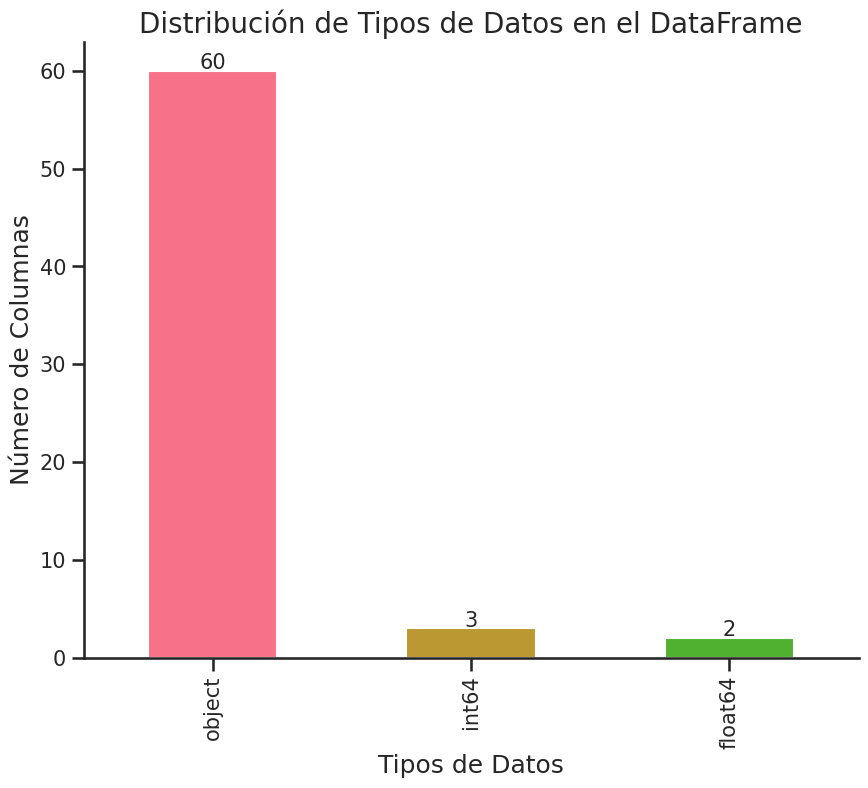

In [263]:
# Establecemos el estilo de Seaborn
sns.set(style="ticks", context="talk", font_scale=1, palette="husl")
# Creamos una figura de tamaño personalizado
plt.figure(figsize=(10, 8))
# Contamos los tipos de datos y creamos un gráfico de barras
ax = df_population.dtypes.value_counts().plot(kind='bar', color=sns.color_palette("husl"), grid=False, fontsize=15)
# Etiquetamos las barras con el recuento de cada tipo de dato
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.2, height, ha='center', size=15)
# Personalizamos el gráfico
ax.set_xlabel("Tipos de Datos", fontsize=18)
ax.set_ylabel("Número de Columnas", fontsize=18)
ax.set_title("Distribución de Tipos de Datos en el DataFrame", fontsize=20)
# Eliminamos los bordes desagradables
sns.despine()
# Mostramos el grafico el gráfico
plt.show()

In [264]:
#Información de los datos
print("Número de filas: ",df_population.shape[0])
print("Número de Columnas:",df_population.shape[1])
print("Datos Duplicados",df_population.duplicated().sum())
print("Variables Categóricas: ",df_population.select_dtypes(include='object').shape[1])
print("Variables Numéricas: ",df_population.select_dtypes(exclude='object').shape[1])

Número de filas:  286
Número de Columnas: 65
Datos Duplicados 0
Variables Categóricas:  60
Variables Numéricas:  5


* Validamos que tenemos 65 columnas y 286 filas
* Evaluaremos que columnas serán más importantes para nuestros análisis

In [265]:
## Realizamos una visión general de nuestros tipos de datos
df_population.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286 entries, 69 to 20593
Data columns (total 65 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   Index                                                                                           286 non-null    int64  
 1   Variant                                                                                         286 non-null    object 
 2   Region, subregion, country or area *                                                            286 non-null    object 
 3   Notes                                                                                           76 non-null     object 
 4   Location code                                                                                   286 non-null    int64  
 5   ISO3 Alpha-c

Mantener en el dataframe sólo las siguientes columnas: ['ISO2 Alpha-code','Total Population, as of 1 July (thousands)','Male Population, as of 1 July (thousands)','Female Population, as of 1 July (thousands)','Population Density, as of 1 July (persons per square km)','Life Expectancy at Birth, both sexes (years)']

In [266]:
#Listamos de columnas que deseas mantener
columnas_a_mantener = ['ISO2 Alpha-code','Total Population, as of 1 July (thousands)','Male Population, as of 1 July (thousands)','Female Population, as of 1 July (thousands)','Population Density, as of 1 July (persons per square km)','Life Expectancy at Birth, both sexes (years)']
# Crear un nuevo DataFrame con solo las columnas deseadas
df_population_limpio = df_population[columnas_a_mantener]
# Mostramos las primeras filas del DataFrame resultante
df_population_limpio.sample(5)

ISO2 Alpha-code Total Population, as of 1 July (thousands)  \
5113               BF                                  20951.639   
16489             NaN                                 174800.777   
7417              NaN                                1948009.379   
7129               KP                                  25755.441   
2593               RE                                    949.419   

      Male Population, as of 1 July (thousands)  \
5113                                  10431.262   
16489                                 85829.299   
7417                                  997230.64   
7129                                  12707.874   
2593                                    458.138   

      Female Population, as of 1 July (thousands)  \
5113                                    10520.378   
16489                                   88971.477   
7417                                    950778.74   
7129                                    13047.566   
2593                                      491.281   

      Population Density, as of 1 July (persons per square km)  \
5113                                              76.578         
16489                                             70.925         
7417                                             304.335         
7129                                             213.898         
2593                                             379.768         

      Life Expectancy at Birth, both sexes (years)  
5113                                        60.039  
16489                                       74.203  
7417                                        70.585  
7129                                        73.198  
2593                                        82.062

Renombrar las columnas para nombre más sencillos:

In [267]:
# Utilizando el método .rename() para cambiar el nombre de las columnas en un DataFrame
# Cambiar el nombre de las columnas especificadas
df_population_limpio = df_population_limpio.rename(columns={
    'ISO2 Alpha-code': 'Country_code',
    'Total Population, as of 1 July (thousands)': 'Total_Population',
    'Male Population, as of 1 July (thousands)': 'Male_Population',
    'Female Population, as of 1 July (thousands)': 'Female_Population',
    'Population Density, as of 1 July (persons per square km)': 'Population_Density',
    'Life Expectancy at Birth, both sexes (years)': 'Life_Expectancy'
})
df_population_limpio.sample(5)

Country_code Total_Population Male_Population Female_Population  \
17857           PY         6530.026        3280.434          3249.592   
6121            SL         8046.828        4030.454          4016.374   
3673            CD         89906.89       44600.412         45306.478   
19585           MH           44.728          22.874            21.855   
935            NaN      5442492.034     2764457.433       2678034.601   

      Population_Density Life_Expectancy  
17857             16.145          73.621  
6121             112.167          60.255  
3673              39.658          60.276  
19585            248.492          64.746  
935               88.871          72.559

In [268]:
df_population_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286 entries, 69 to 20593
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country_code        236 non-null    object
 1   Total_Population    286 non-null    object
 2   Male_Population     286 non-null    object
 3   Female_Population   286 non-null    object
 4   Population_Density  286 non-null    object
 5   Life_Expectancy     286 non-null    object
dtypes: object(6)
memory usage: 15.6+ KB


Eliminar todos los registros nulos.

In [269]:
#datos nulos por columna
df_population_limpio.isnull().sum().sort_values(ascending=False)

Country_code          50
Total_Population       0
Male_Population        0
Female_Population      0
Population_Density     0
Life_Expectancy        0
dtype: int64

Text(0, 0.5, 'Filas')

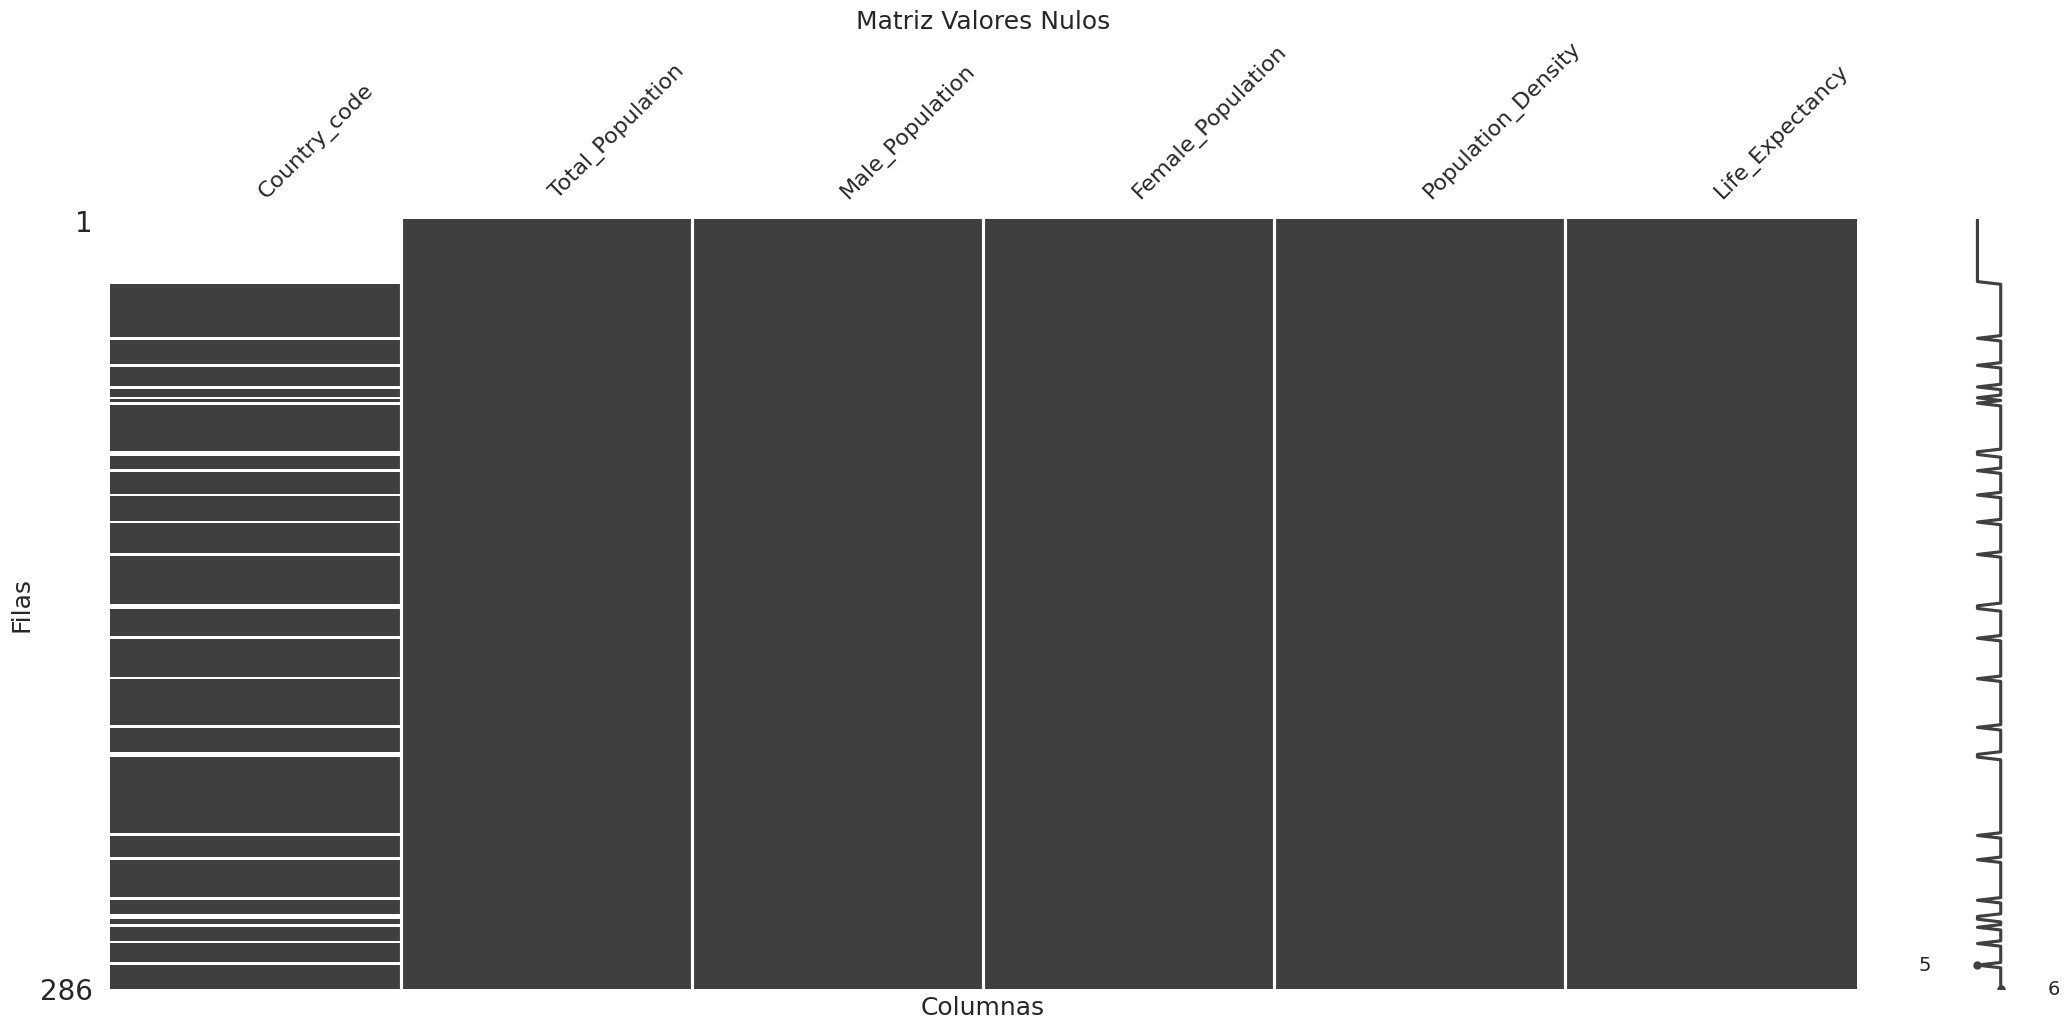

In [270]:
# Visualización con seaborn de los valores nulos
msno.matrix(df_population_limpio)
plt.title('Matriz Valores Nulos')
plt.xlabel('Columnas')
plt.ylabel('Filas')

In [271]:
# Eliminar todas las filas que contienen al menos un valor nulo
df_population_limpio = df_population_limpio.dropna()

Text(0, 0.5, 'Filas')

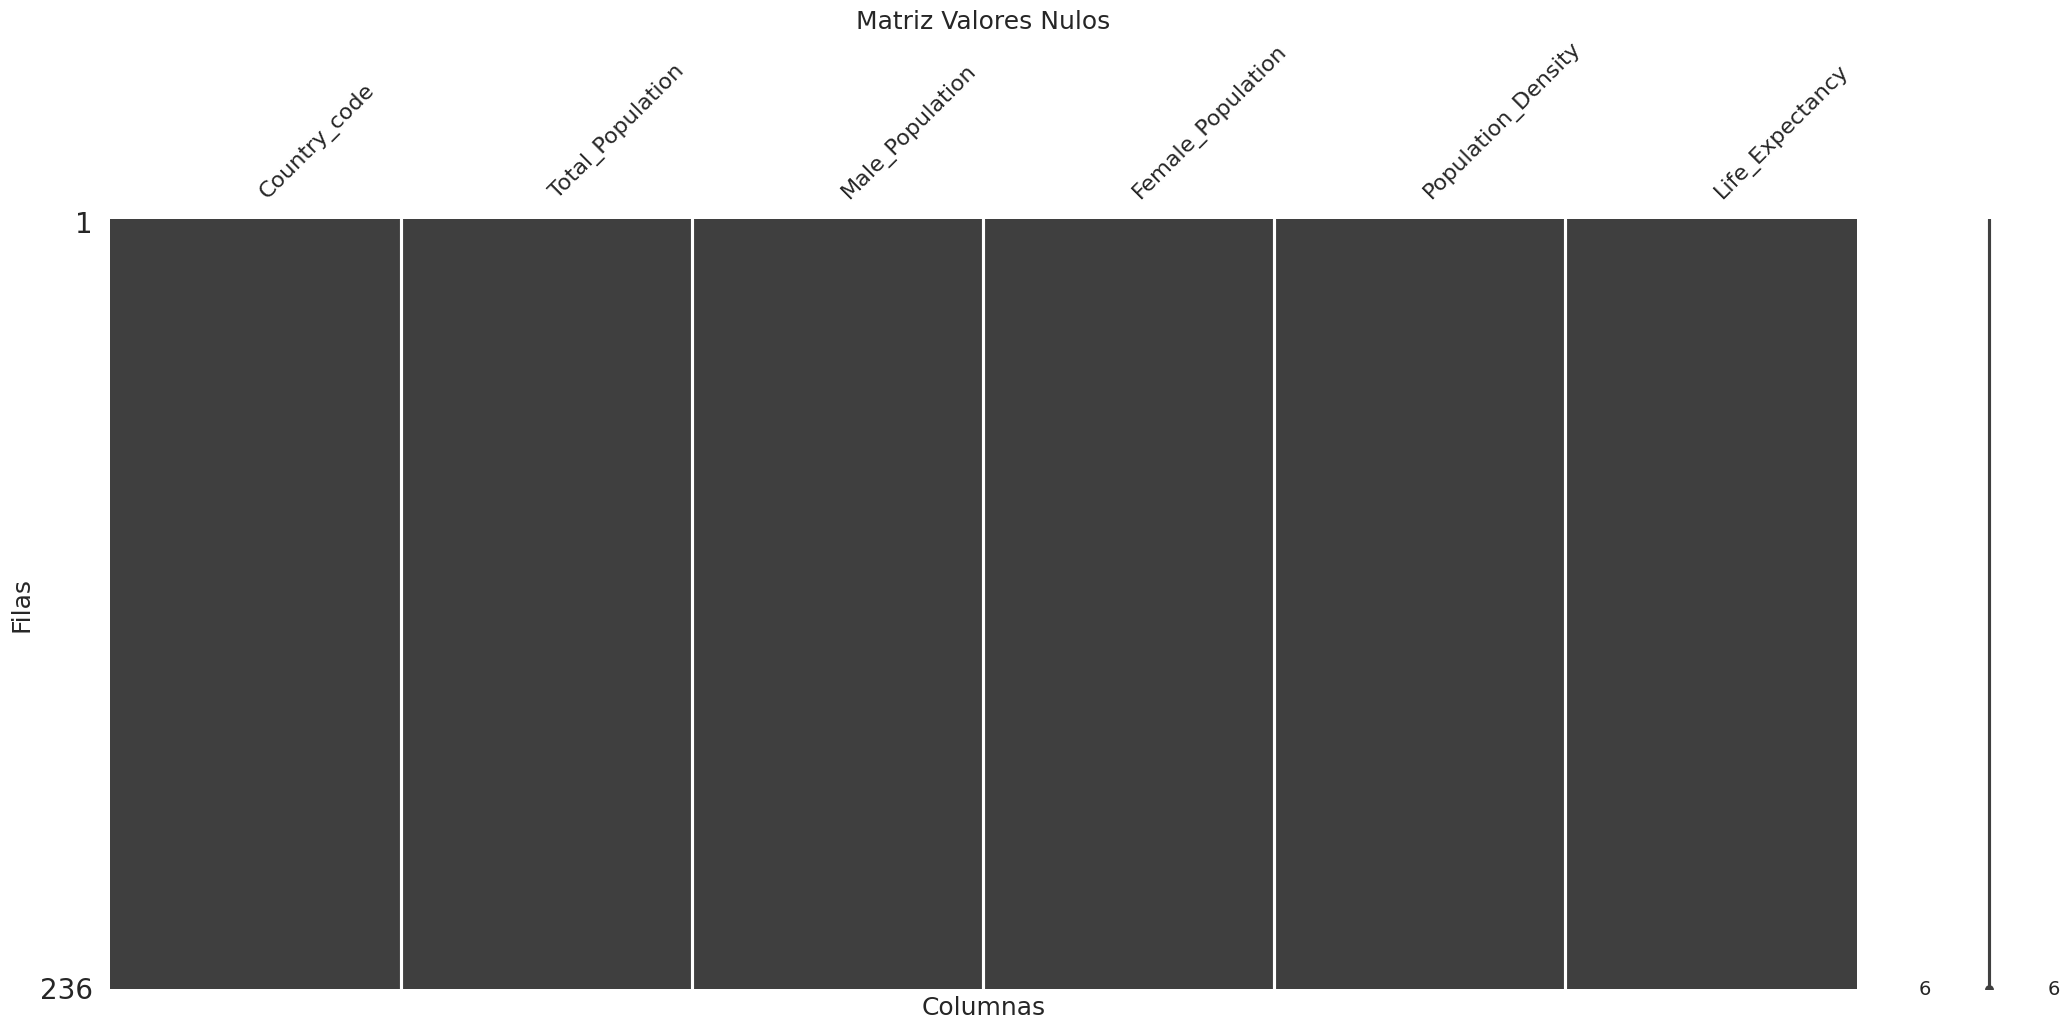

In [272]:
# Visualización con seaborn de los valores nulos
msno.matrix(df_population_limpio)
plt.title('Matriz Valores Nulos')
plt.xlabel('Columnas')
plt.ylabel('Filas')

Substituir el formato actual de las columnas
['Total_Population','Male_Population','Female_Population','Population_Density','Life_Expectancy']para un formato de tipo int64.

los campos que necesitamos convertir tienen valores pero hay valores no enteros en la columna que estamos tratando de convertir.

In [273]:
# Columnas que deseas convertir
columns_to_convert = ['Total_Population', 'Male_Population', 'Population_Density', 'Life_Expectancy']

# Manejar los NaN y valores no numéricos
for column in columns_to_convert:
    df_population_limpio[column] = pd.to_numeric(df_population_limpio[column], errors='coerce')

# Lidiar con NaN asignando un valor predeterminado
fill_value = 0  # Puedes cambiar esto al valor que desees
df_population_limpio[columns_to_convert] = df_population_limpio[columns_to_convert].fillna(fill_value)

In [274]:
# Verificar el tipo de dato después de la conversión
print("Tipo de dato después de la conversión de Total_Population:", df_population_limpio['Total_Population'].dtype)
print("Tipo de dato después de la conversión de Male_Population:", df_population_limpio['Male_Population'].dtype)
print("Tipo de dato después de la conversión de Population_Density:", df_population_limpio['Population_Density'].dtype)
print("Tipo de dato después de la conversión de Life_Expectancy:", df_population_limpio['Life_Expectancy'].dtype)


Tipo de dato después de la conversión de Total_Population: float64
Tipo de dato después de la conversión de Male_Population: float64
Tipo de dato después de la conversión de Population_Density: float64
Tipo de dato después de la conversión de Life_Expectancy: float64


Multiplicar por 1000 el valor actual de las siguientes columnas 'Total_Population','Male_Population','Female_Population' y sobreescribirlas.

Substituir todos los valores nulos con cero.

In [275]:
# Multiplicar por 1000 y sobreescribir las columnas
columns_to_multiply = ['Total_Population', 'Male_Population', 'Female_Population']

df_population_limpio[columns_to_multiply] = df_population_limpio[columns_to_multiply] * 1000

# Substituir los valores nulos con cero
df_population_limpio = df_population_limpio.fillna(0)


Substituir todos los valores nulos con cero.

Finalmente reiniciaremos el índice del dataframe final df_population_limpio

In [276]:
#Reiniciar el índice del DataFrame
df_population_limpio = df_population_limpio.reset_index(drop=True)
# Mostramos 5 filas del DataFrame resultante
df_population_limpio.head(5)

Country_code  Total_Population  Male_Population Female_Population  \
0           BI        11874838.0        5894278.0         5980560.0   
1           KM          790986.0         397126.0          393860.0   
2           DJ         1073994.0         533626.0          540367.0   
3           ER         3498818.0        1724860.0         1773958.0   
4           ET       114120594.0       57375433.0        56745161.0   

   Population_Density  Life_Expectancy  
0             457.605           62.351  
1             425.033           64.068  
2              46.333           63.085  
3              28.881           67.300  
4             114.121           65.838

# 3. Planteamiento de Preguntas

#Pregunta 1



> ¿Cómo ha evolucionado el Covid-19 en el país en comparación con el impacto observado a nivel global?






Para realizar este análisis necesitamos construir 2 bases de datos diferentes para los 2 gráficos mostrados:

**Worldwide Cases Distribution**

Usando el dataframe df_covid_limpio, vamos a agrupar por país y obtener el máximo valor de la columna Cumulative_cases, luego lo ordenamos descendentemente y guardamos el resultado en total_por_pais.

Luego, seleccionamos los 10 primeros países y guardamos el resultado en top_10_paises.

In [284]:
# Agrupar por país y obtener el máximo valor de Cumulative_cases
top_10_paises = df_covid_limpio.groupby('Country')['Cumulative_cases'].max().reset_index()[['Country', 'Cumulative_cases']]

# Ordenar descendentemente
top_10_paises = top_10_paises.sort_values(by='Cumulative_cases', ascending=False)

# Mostrar el resultado final
top_10_paises.head(10)


Country  Cumulative_cases
222                           United States of America         103436829
42                                               China          99326423
96                                               India          45023751
72                                              France          38997490
78                                             Germany          38437756
28                                              Brazil          37519960
168                                  Republic of Korea          34571873
105                                              Japan          33803572
103                                              Italy          26693706
219  United Kingdom of Great Britain and Northern I...          24885790

In [285]:
# ## Agrupando los países que no están en el top 10
otros_paises = df_covid_limpio.groupby('Country')['Cumulative_cases'].max().reset_index()[['Country', 'Cumulative_cases']].sort_values(by='Cumulative_cases', ascending=False).iloc[10:]
otros_paises.head()


Country  Cumulative_cases
171  Russian Federation          23773710
215             Türkiye          17004677
197               Spain          13980340
11            Australia          11752647
227            Viet Nam          11624000

In [286]:
## Conseguimos los 3 países que analizaremos el COVID 19: México - Perú - Colombia
paises_evaluar = otros_paises[(otros_paises['Country']== 'Mexico') | (otros_paises['Country']=='Peru')
                                       | (otros_paises['Country']=='Colombia')]
paises_evaluar

Country  Cumulative_cases
134    Mexico           7702809
43   Colombia           6391672
161      Peru           4536733

In [287]:
## Casos acumulados por los países que no están en el Top 10 menos los 3 países que estamos analizando
otros_paises_sin_analisis = otros_paises['Cumulative_cases'].sum() - paises_evaluar['Cumulative_cases'].sum()
otros_paises_sin_analisis

272888641

In [288]:
# Agrupar por país y obtener el máximo valor de Cumulative_cases
total_por_pais = (
    df_covid_limpio.groupby('Country')['Cumulative_cases']
    .max()
    .reset_index()
    .sort_values(by='Cumulative_cases', ascending=False)
)

# Incluir los 10 primeros países y los 3 países adicionales en una sola variable
top_10_paises = total_por_pais.head(10)
paises_adicionales = total_por_pais[total_por_pais['Country'].isin(['Mexico', 'Peru', 'Colombia'])]

# Concatenar los DataFrames
top_10_paises = pd.concat([top_10_paises, paises_adicionales], ignore_index=True)

## Adicionando nueva fila al dataframe top_10_countries
nueva_fila = {'Country': 'otros_paises', 'Cumulative_cases': otros_paises_sin_analisis}
top_10_paises = top_10_paises.append(nueva_fila,ignore_index=True)

# Mostrar el resultado final
top_10_paises

<ipython-input-288-8de2ebaec4a8>:18: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Country  Cumulative_cases
0                            United States of America         103436829
1                                               China          99326423
2                                               India          45023751
3                                              France          38997490
4                                             Germany          38437756
5                                              Brazil          37519960
6                                   Republic of Korea          34571873
7                                               Japan          33803572
8                                               Italy          26693706
9   United Kingdom of Great Britain and Northern I...          24885790
10                                             Mexico           7702809
11                                           Colombia           6391672
12                                               Peru           4536733
13                                       otros_paises         272888641

In [289]:
# Modificando los nombres de algunos países por su longitud
top_10_paises['Country'] = top_10_paises['Country'].replace({
    'United States of America': 'USA',
    'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom'
})

# Mostrar el DataFrame resultante
top_10_paises


Country  Cumulative_cases
0                 USA         103436829
1               China          99326423
2               India          45023751
3              France          38997490
4             Germany          38437756
5              Brazil          37519960
6   Republic of Korea          34571873
7               Japan          33803572
8               Italy          26693706
9      United Kingdom          24885790
10             Mexico           7702809
11           Colombia           6391672
12               Peru           4536733
13       otros_paises         272888641

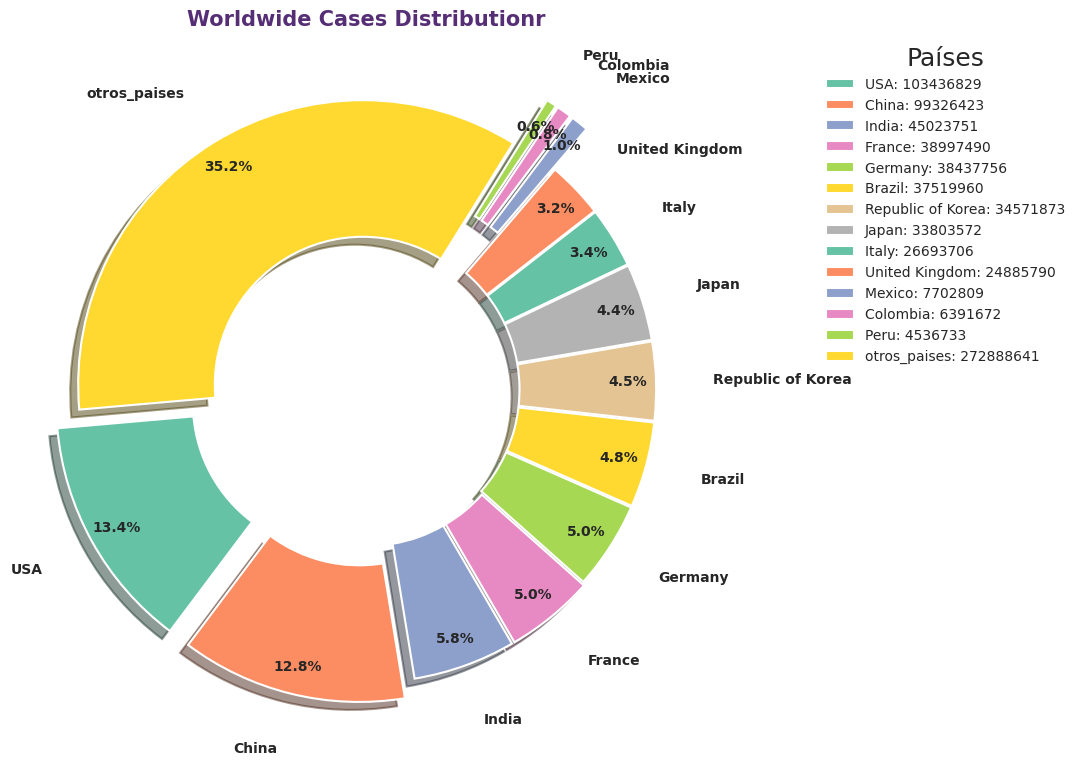

In [290]:
# Datos
valores = top_10_paises['Cumulative_cases']
etiqueta = top_10_paises['Country']
explode = (0.1, 0.1, 0.03, 0.03, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.2, 0.2, 0.2, 0.02)

# Colores personalizados usando la paleta 'Set3' de seaborn
colors = sns.color_palette('Set2', len(valores))

plt.figure(figsize=(12, 8))
patches, texts, autotexts = plt.pie(valores, labels=etiqueta, explode=explode, autopct='%1.1f%%',
                                    textprops={'fontsize': 10, 'weight': 'bold'}, pctdistance=0.9,
                                    startangle=185, wedgeprops=dict(width=0.48, edgecolor='w'), labeldistance=1.2, colors=colors, shadow=True)

# Agregar leyenda en la parte superior izquierda fuera de la dona
legend_labels = [f'{etiqueta[i]}: {valores[i]}' for i in range(len(valores))]
plt.legend(patches, legend_labels, title='Países', loc='upper right', bbox_to_anchor=(1.5, 1.0), fontsize=10)

plt.title('Worldwide Cases Distributionr', fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': '#552E75'})
plt.tight_layout()
plt.show()

## **Case Progression by Country**

Luego, seleccionamos los 5 primeros países y guardamos el resultado en top_5_paises.

In [309]:
## Escogemos los 5 países con más casos acumulados
total_5_paises = df_covid_limpio.groupby('Country').max().reset_index()[['Country','Cumulative_cases']].sort_values(by='Cumulative_cases',ascending=False).head(5)
total_5_paises

Country  Cumulative_cases
222  United States of America         103436829
42                      China          99326423
96                      India          45023751
72                     France          38997490
78                    Germany          38437756

In [310]:
# Usando concat para agregar los 3 paises a analizar
total_5_paises = pd.concat([total_5_paises, paises_evaluar], ignore_index= True)
total_5_paises

Country  Cumulative_cases
0  United States of America         103436829
1                     China          99326423
2                     India          45023751
3                    France          38997490
4                   Germany          38437756
5                    Mexico           7702809
6                  Colombia           6391672
7                      Peru           4536733

In [311]:
## Creamos un dataframe que contenga solo 3 columnas elegidas
df_casos_acumulados = df_covid_limpio[['Country','Date_reported','Cumulative_cases']]
df_casos_acumulados

Country Date_reported  Cumulative_cases
0      Afghanistan    2020-01-05                 0
1      Afghanistan    2020-01-12                 0
2      Afghanistan    2020-01-19                 0
3      Afghanistan    2020-01-26                 0
4      Afghanistan    2020-02-02                 0
...            ...           ...               ...
48897     Zimbabwe    2023-12-24            266048
48898     Zimbabwe    2023-12-31            266071
48899     Zimbabwe    2024-01-07            266117
48900     Zimbabwe    2024-01-14            266202
48901     Zimbabwe    2024-01-21            266257

[48902 rows x 3 columns]

In [312]:
## Agrupamos el dataframe creado solo por nuestro top 5 de países con más casos acumulados
df_top5_acumulados = df_casos_acumulados[df_casos_acumulados['Country'].isin(total_5_paises['Country'])]
df_top5_acumulados

Country Date_reported  Cumulative_cases
8851                      China    2020-01-05                 1
8852                      China    2020-01-12                45
8853                      China    2020-01-19               125
8854                      China    2020-01-26              1985
8855                      China    2020-02-02             14411
...                         ...           ...               ...
46983  United States of America    2023-12-24         103436829
46984  United States of America    2023-12-31         103436829
46985  United States of America    2024-01-07         103436829
46986  United States of America    2024-01-14         103436829
46987  United States of America    2024-01-21         103436829

[1626 rows x 3 columns]

In [313]:
## Hacemos uso de la función pivot, a fin de crear una tabla descriptiva de como se iba acumulando los casos para nuestro top5
total_top5_acumulados = df_top5_acumulados.pivot(index='Country', columns='Date_reported', values='Cumulative_cases')
total_top5_acumulados

Date_reported             2020-01-05  2020-01-12  2020-01-19  2020-01-26  \
Country                                                                    
China                            1.0        45.0       125.0      1985.0   
Colombia                         0.0         0.0         0.0         0.0   
France                           0.0         0.0         0.0         3.0   
Germany                          NaN         NaN         NaN         NaN   
India                            0.0         0.0         0.0         0.0   
Mexico                           0.0         0.0         0.0         0.0   
Peru                             0.0         0.0         0.0         0.0   
United States of America         0.0         0.0         0.0         7.0   

Date_reported             2020-02-02  2020-02-09  2020-02-16  2020-02-23  \
Country                                                                    
China                        14411.0     37251.0     68584.0     77042.0   
Colombia                         0.0         0.0         0.0         0.0   
France                           6.0        12.0        12.0        16.0   
Germany                          NaN         NaN         NaN         NaN   
India                            2.0         7.0         7.0         7.0   
Mexico                           0.0         0.0         0.0         1.0   
Peru                             0.0         0.0         0.0         0.0   
United States of America         9.0        20.0        24.0        40.0   

Date_reported             2020-03-01  2020-03-08  ...   2023-11-19  \
Country                                           ...                
China                        79968.0     80859.0  ...   99320035.0   
Colombia                         0.0         1.0  ...    6383595.0   
France                          16.0        16.0  ...   38997490.0   
Germany                        170.0      1075.0  ...   38437756.0   
India                            7.0        39.0  ...   45001575.0   
Mexico                           6.0        51.0  ...    7702324.0   
Peru                             0.0         9.0  ...    4525960.0   
United States of America        73.0       464.0  ...  103436829.0   

Date_reported              2023-11-26   2023-12-03   2023-12-10   2023-12-17  \
Country                                                                        
China                      99320425.0   99320845.0   99321242.0   99321637.0   
Colombia                    6383948.0    6384224.0    6384551.0    6384979.0   
France                     38997490.0   38997490.0   38997490.0   38997490.0   
Germany                    38437756.0   38437756.0   38437756.0   38437756.0   
India                      45001764.0   45002179.0   45003055.0   45004816.0   
Mexico                      7702412.0    7702517.0    7702619.0    7702738.0   
Peru                        4527448.0    4529542.0    4532076.0    4535365.0   
United States of America  103436829.0  103436829.0  103436829.0  103436829.0   

Date_reported              2023-12-24   2023-12-31   2024-01-07   2024-01-14  \
Country                                                                        
China                      99322142.0   99322727.0   99323756.0   99325108.0   
Colombia                    6385539.0    6386231.0    6387209.0    6389365.0   
France                     38997490.0   38997490.0   38997490.0   38997490.0   
Germany                    38437756.0   38437756.0   38437756.0   38437756.0   
India                      45008620.0   45013172.0   45018134.0   45021758.0   
Mexico                      7702802.0    7702809.0    7702809.0    7702809.0   
Peru                        4536698.0    4536733.0    4536733.0    4536733.0   
United States of America  103436829.0  103436829.0  103436829.0  103436829.0   

Date_reported              2024-01-21  
Country                                
China                      99326423.0  
Colombia                    6391672.0  
France         

In [314]:
## Hacemos uso de la función pivot, a fin de crear una tabla descriptiva de como se iba acumulando los casos para nuestro top5
total_top5_acumulados = df_top5_acumulados.pivot(index='Date_reported', columns='Country', values='Cumulative_cases').reset_index()
total_top5_acumulados

Country Date_reported       China   Colombia      France     Germany  \
0          2020-01-05         1.0        0.0         0.0         NaN   
1          2020-01-12        45.0        0.0         0.0         NaN   
2          2020-01-19       125.0        0.0         0.0         NaN   
3          2020-01-26      1985.0        0.0         3.0         NaN   
4          2020-02-02     14411.0        0.0         6.0         NaN   
..                ...         ...        ...         ...         ...   
207        2023-12-24  99322142.0  6385539.0  38997490.0  38437756.0   
208        2023-12-31  99322727.0  6386231.0  38997490.0  38437756.0   
209        2024-01-07  99323756.0  6387209.0  38997490.0  38437756.0   
210        2024-01-14  99325108.0  6389365.0  38997490.0  38437756.0   
211        2024-01-21  99326423.0  6391672.0  38997490.0  38437756.0   

Country       India     Mexico       Peru  United States of America  
0               0.0        0.0        0.0                       0.0  
1               0.0        0.0        0.0                       0.0  
2               0.0        0.0        0.0                       0.0  
3               0.0        0.0        0.0                       7.0  
4               2.0        0.0        0.0                       9.0  
..              ...        ...        ...                       ...  
207      45008620.0  7702802.0  4536698.0               103436829.0  
208      45013172.0  7702809.0  4536733.0               103436829.0  
209      45018134.0  7702809.0  4536733.0               103436829.0  
210      45021758.0  7702809.0  4536733.0               103436829.0  
211      45023751.0  7702809.0  4536733.0               103436829.0  

[212 rows x 9 columns]

In [315]:
total_top5_acumulados['Cumulative_days'] = total_top5_acumulados['Date_reported'].diff().dt.days.fillna(0).cumsum()
total_top5_acumulados

Country Date_reported       China   Colombia      France     Germany  \
0          2020-01-05         1.0        0.0         0.0         NaN   
1          2020-01-12        45.0        0.0         0.0         NaN   
2          2020-01-19       125.0        0.0         0.0         NaN   
3          2020-01-26      1985.0        0.0         3.0         NaN   
4          2020-02-02     14411.0        0.0         6.0         NaN   
..                ...         ...        ...         ...         ...   
207        2023-12-24  99322142.0  6385539.0  38997490.0  38437756.0   
208        2023-12-31  99322727.0  6386231.0  38997490.0  38437756.0   
209        2024-01-07  99323756.0  6387209.0  38997490.0  38437756.0   
210        2024-01-14  99325108.0  6389365.0  38997490.0  38437756.0   
211        2024-01-21  99326423.0  6391672.0  38997490.0  38437756.0   

Country       India     Mexico       Peru  United States of America  \
0               0.0        0.0        0.0                       0.0   
1               0.0        0.0        0.0                       0.0   
2               0.0        0.0        0.0                       0.0   
3               0.0        0.0        0.0                       7.0   
4               2.0        0.0        0.0                       9.0   
..              ...        ...        ...                       ...   
207      45008620.0  7702802.0  4536698.0               103436829.0   
208      45013172.0  7702809.0  4536733.0               103436829.0   
209      45018134.0  7702809.0  4536733.0               103436829.0   
210      45021758.0  7702809.0  4536733.0               103436829.0   
211      45023751.0  7702809.0  4536733.0               103436829.0   

Country  Cumulative_days  
0                    0.0  
1                    7.0  
2                   14.0  
3                   21.0  
4                   28.0  
..                   ...  
207               1449.0  
208               1456.0  
209               1463.0  
210               1470.0  
211               1477.0  

[212 rows x 10 columns]

<ipython-input-327-a1db4a4ca203>:5: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



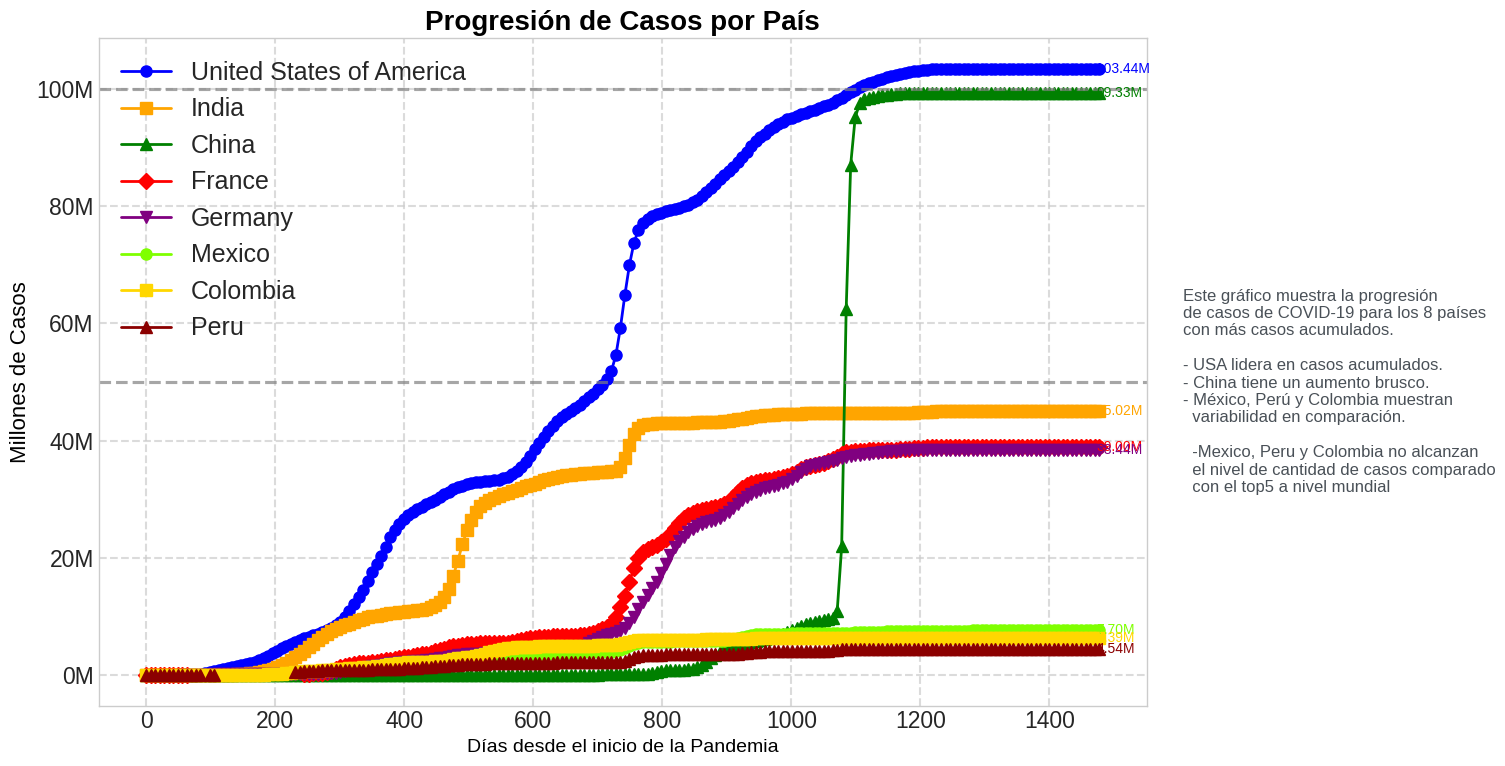

In [327]:
from matplotlib.ticker import FuncFormatter

# Configurar el tamaño del gráfico y el estilo de Seaborn
plt.figure(figsize=(12, 8))
plt.style.use('seaborn-whitegrid')

# Datos de x y y
x = total_top5_acumulados['Cumulative_days']
y = total_top5_acumulados[['United States of America', 'India', 'China', 'France', 'Germany', 'Mexico', 'Colombia', 'Peru']]

# Colores más distintivos
colores = ['blue', 'orange', 'green', 'red', 'purple', 'chartreuse', 'gold', 'darkred']

# Marcadores más pequeños
marcadores = ['o', 's', '^', 'D', 'v', 'o', 's', '^']

# Crear líneas para cada país con etiquetas, colores y marcadores
for i, (country, color, marcador) in enumerate(zip(y.columns, colores, marcadores)):
    plt.plot(x, y[country], label=country, color=color, linewidth=2, marker=marcador, markersize=8)

    # Agregar etiquetas de datos al final de cada línea
    plt.text(x.iloc[-2] + 2, y[country].iloc[-2], f'{y[country].iloc[-2] / 1e6:.2f}M', color=color, fontsize=10, va='center')

# Añadir título y etiquetas
plt.title('Progresión de Casos por País', fontdict={'fontsize': 20, 'fontweight': 'bold', 'color': 'black'})
plt.xlabel('Días desde el inicio de la Pandemia', fontdict={'fontsize': 14, 'color': 'black'})
plt.ylabel('Millones de Casos', fontdict={'fontsize': 16, 'color': 'black'})

# Añadir formateo al eje Y con números enteros y "M" para millones
def millions_formatter(x, _):
    return f'{int(x/1e6)}M'

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Añadir texto de conclusión
conclusion_text = '''
Este gráfico muestra la progresión
de casos de COVID-19 para los 8 países
con más casos acumulados.

- USA lidera en casos acumulados.
- China tiene un aumento brusco.
- México, Perú y Colombia muestran
  variabilidad en comparación.

  -Mexico, Peru y Colombia no alcanzan
  el nivel de cantidad de casos comparado
  con el top5 a nivel mundial'''

plt.figtext(1, 0.5, conclusion_text, fontsize=12, color='#495057', va='center', ha='left')

# Añadir leyenda, líneas de referencia y ajustar diseño
plt.legend(fontsize='medium')
plt.axhline(y=50e6, color='gray', linestyle='--', alpha=0.7, label='50M casos (referencia)')
plt.axhline(y=100e6, color='gray', linestyle='--', alpha=0.7, label='100M casos (referencia)')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


# 2¿Cuál ha sido la evolución de los nuevos casos diarios reportados de Covid-19 en el país a lo largo del tiempo?


Para realizar este análisis necesitamos construir primero la base de datos para usarla en el gráfico mostrado

Usando el dataframe df_covid_limpio, vamos a agrupar por país y fecha para obtener el valor de la columna Cumulative_cases, luego guardamos el resultado en grouped_df.

In [432]:
# Agrupar por país y fecha para obtener el valor de Cumulative_cases
grouped_df = df_covid_limpio.groupby(['Country', 'Date_reported'])['Cumulative_cases'].sum().unstack()

# Seleccionar solo los datos para el país 'Mexico'
df_mexico = grouped_df.loc[['Mexico']]

# Calcular la diferencia entre la columna actual y la columna anterior para obtener nuevos casos diarios
new_cases_mexico = df_mexico.diff(axis=1).fillna(df_mexico)

# Seleccionar solo las columnas con nuevos casos mayores que 0
new_cases_mexico = new_cases_mexico[new_cases_mexico > 0]

# Sumar nuevos casos para cada fecha
daily_new_cases_mexico = new_cases_mexico.sum(axis=0)

# Mostrar el resultado para México
print("Nuevos casos diarios en México:")
print(daily_new_cases_mexico)

# Repetir el proceso para Perú
df_peru = grouped_df.loc[['Peru']]
new_cases_peru = df_peru.diff(axis=1).fillna(df_peru)
new_cases_peru = new_cases_peru[new_cases_peru > 0]
daily_new_cases_peru = new_cases_peru.sum(axis=0)

print("\nNuevos casos diarios en Perú:")
print(daily_new_cases_peru)

# Repetir el proceso para Colombia
df_colombia = grouped_df.loc[['Colombia']]
new_cases_colombia = df_colombia.diff(axis=1).fillna(df_colombia)
new_cases_colombia = new_cases_colombia[new_cases_colombia > 0]
daily_new_cases_colombia = new_cases_colombia.sum(axis=0)

print("\nNuevos casos diarios en Colombia:")
print(daily_new_cases_colombia)


Nuevos casos diarios en México:
Date_reported
2020-01-05     0.0
2020-01-12     0.0
2020-01-19     0.0
2020-01-26     0.0
2020-02-02     0.0
              ... 
2023-12-24    64.0
2023-12-31     7.0
2024-01-07     0.0
2024-01-14     0.0
2024-01-21     0.0
Length: 212, dtype: float64

Nuevos casos diarios en Perú:
Date_reported
2020-01-05       0.0
2020-01-12       0.0
2020-01-19       0.0
2020-01-26       0.0
2020-02-02       0.0
               ...  
2023-12-24    1333.0
2023-12-31      35.0
2024-01-07       0.0
2024-01-14       0.0
2024-01-21       0.0
Length: 212, dtype: float64

Nuevos casos diarios en Colombia:
Date_reported
2020-01-05       0.0
2020-01-12       0.0
2020-01-19       0.0
2020-01-26       0.0
2020-02-02       0.0
               ...  
2023-12-24     560.0
2023-12-31     692.0
2024-01-07     978.0
2024-01-14    2156.0
2024-01-21    2307.0
Length: 212, dtype: float64


In [433]:
df_mexico.head()


Date_reported  2020-01-05  2020-01-12  2020-01-19  2020-01-26  2020-02-02  \
Country                                                                     
Mexico                0.0         0.0         0.0         0.0         0.0   

Date_reported  2020-02-09  2020-02-16  2020-02-23  2020-03-01  2020-03-08  \
Country                                                                     
Mexico                0.0         0.0         1.0         6.0        51.0   

Date_reported  ...  2023-11-19  2023-11-26  2023-12-03  2023-12-10  \
Country        ...                                                   
Mexico         ...   7702324.0   7702412.0   7702517.0   7702619.0   

Date_reported  2023-12-17  2023-12-24  2023-12-31  2024-01-07  2024-01-14  \
Country                                                                     
Mexico          7702738.0   7702802.0   7702809.0   7702809.0   7702809.0   

Date_reported  2024-01-21  
Country                    
Mexico          7702809.0  

[1 rows x 212 columns]

In [434]:
df_peru.head()

Date_reported  2020-01-05  2020-01-12  2020-01-19  2020-01-26  2020-02-02  \
Country                                                                     
Peru                  0.0         0.0         0.0         0.0         0.0   

Date_reported  2020-02-09  2020-02-16  2020-02-23  2020-03-01  2020-03-08  \
Country                                                                     
Peru                  0.0         0.0         0.0         0.0         9.0   

Date_reported  ...  2023-11-19  2023-11-26  2023-12-03  2023-12-10  \
Country        ...                                                   
Peru           ...   4525960.0   4527448.0   4529542.0   4532076.0   

Date_reported  2023-12-17  2023-12-24  2023-12-31  2024-01-07  2024-01-14  \
Country                                                                     
Peru            4535365.0   4536698.0   4536733.0   4536733.0   4536733.0   

Date_reported  2024-01-21  
Country                    
Peru            4536733.0  

[1 rows x 212 columns]

In [435]:
df_colombia.head()

Date_reported  2020-01-05  2020-01-12  2020-01-19  2020-01-26  2020-02-02  \
Country                                                                     
Colombia              0.0         0.0         0.0         0.0         0.0   

Date_reported  2020-02-09  2020-02-16  2020-02-23  2020-03-01  2020-03-08  \
Country                                                                     
Colombia              0.0         0.0         0.0         0.0         1.0   

Date_reported  ...  2023-11-19  2023-11-26  2023-12-03  2023-12-10  \
Country        ...                                                   
Colombia       ...   6383595.0   6383948.0   6384224.0   6384551.0   

Date_reported  2023-12-17  2023-12-24  2023-12-31  2024-01-07  2024-01-14  \
Country                                                                     
Colombia        6384979.0   6385539.0   6386231.0   6387209.0   6389365.0   

Date_reported  2024-01-21  
Country                    
Colombia        6391672.0  

[1 rows x 212 columns]

In [441]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go


# Rellenar los valores nulos con ceros
daily_new_cases_mexico = daily_new_cases_mexico.fillna(0)
daily_new_cases_colombia = daily_new_cases_colombia.fillna(0)
daily_new_cases_peru = daily_new_cases_peru.fillna(0)

# Crear subgráficos
fig = make_subplots(rows=1, cols=3, subplot_titles=('Nuevos Casos Diarios - México','Nuevos Casos Diarios - Colombia','Nuevos Casos Diarios - Peru'))

# Convertir los valores a listas
x_values = daily_new_cases_mexico.index.tolist()
y_values = daily_new_cases_mexico.values.tolist()

x_values = daily_new_cases_colombia.index.tolist()
y_values = daily_new_cases_colombia.values.tolist()

x_values = daily_new_cases_peru.index.tolist()
y_values = daily_new_cases_peru.values.tolist()

# Crear trazas
trace1 = go.Scatter(x=x_values, y=y_values, name="Nuevos Casos Diarios México",
                    line=dict(color='orange'), mode='lines+markers', opacity=0.8)



trace2 = go.Scatter(x=x_values, y=y_values, name="Nuevos Casos Diarios Colombia",
                    line=dict(color='yellow'), mode='lines+markers', opacity=0.8)


trace2 = go.Scatter(x=x_values, y=y_values, name="Nuevos Casos Diarios Peru",
                    line=dict(color='red'), mode='lines+markers', opacity=0.8)


# Añadir trazas a los subgráficos
fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=1, col=2)
fig.add_trace(trace3, row=1, col=3)

# Configuración del diseño
fig.update_layout(template="plotly_dark", title_text='<b>Propagación de nuevos casos diarios de COVID-19 Paises a evaluar</b>',
                  font=dict(family="Arial, Balto, Courier New, Droid Sans", color='white'))

# Etiquetas de los ejes
fig.update_xaxes(title_text='Fecha')
fig.update_yaxes(title_text='Nuevos Casos Diarios')

# Mostrar el gráfico
fig.show()

#3. ¿Cuál es la evolución del índice de letalidad del Covid-19 en el país, comparado con los países con los índices históricos más elevados?